# Census Income
## Project Description
### This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over 50K a year.

## Description of fnlwgt (final weight)
### The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

### A single cell estimate of the population 16+ for each state.

### Controls for Hispanic Origin by age and sex.

### Controls by Race, age and sex.

### We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sneha/Downloads/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

## The Output , Income is a categorical Column. 

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64 




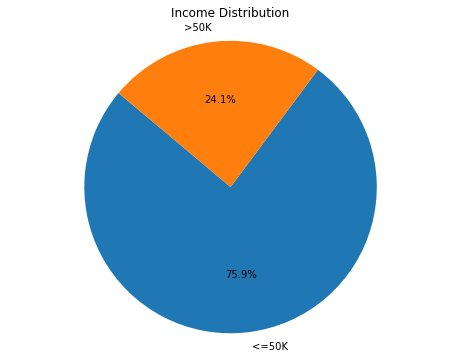

In [9]:
income_counts = df['Income'].value_counts()

print(income_counts,'\n\n')
# Plot a pie chart
plt.figure(figsize=(8, 6))

plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Workclass : 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 




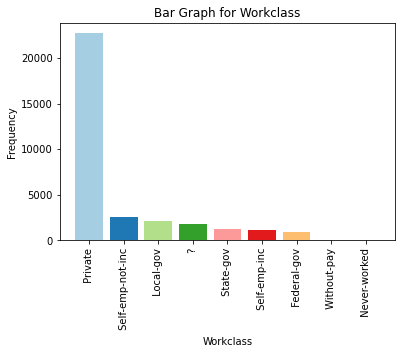

Education : 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 




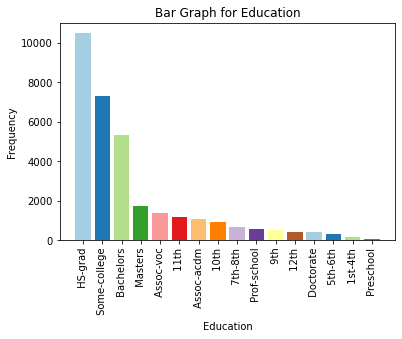

Marital_status : 

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64 




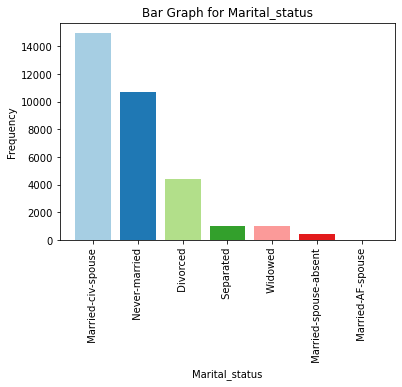

Occupation : 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 




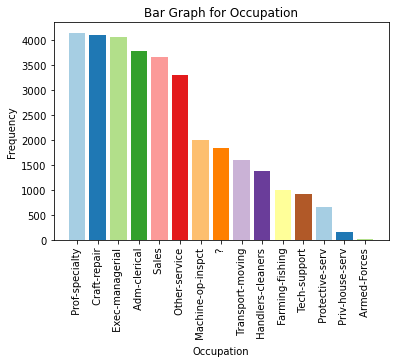

Relationship : 

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64 




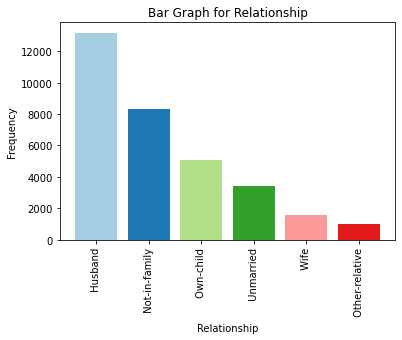

Race : 

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64 




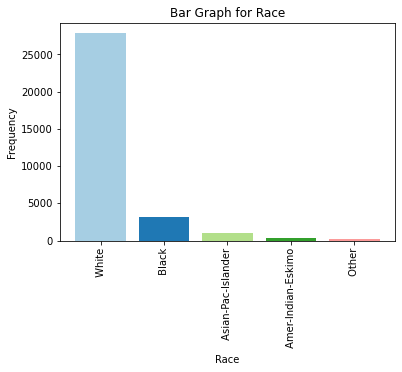

Sex : 

 Male      21789
 Female    10771
Name: Sex, dtype: int64 




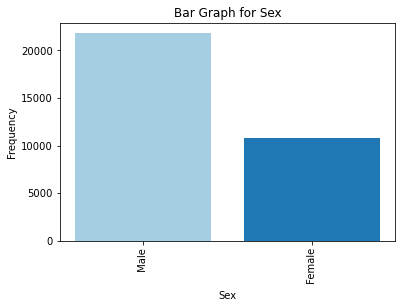

Native_country : 

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru              

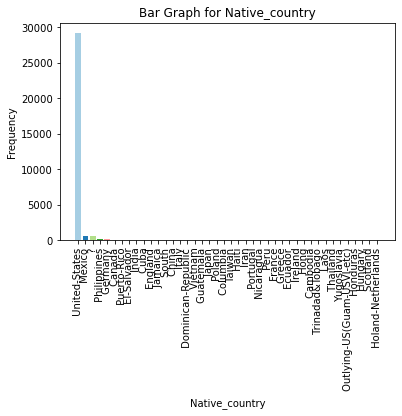

Income : 

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64 




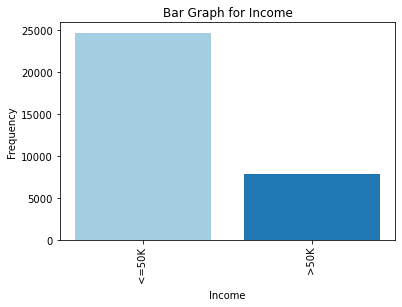

In [10]:
# Create histograms for float columns
obj_columns = df.select_dtypes(include='object')    
for col in obj_columns:
    # Calculate the frequency of each category in the column
    value_counts = df[col].value_counts()
    print(col,': \n')
    print(value_counts,'\n\n')
    # Create a bar graph for the current column
    plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)
    
    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph for {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()

# "?" are the missing values in columns Workclass , Occupation and Native Country.  Lets drop them. 

In [11]:
null_df = df.loc[(df.Native_country==' ?')|(df.Workclass==' ?')|(df.Occupation==' ?')]
null_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
mask = df.isin(null_df).all(axis=1)

# Use boolean indexing to drop rows from 'df'
df = df[~mask]
df.shape

(30161, 15)

In [13]:
X = df.drop(columns=['Income'])
y = df['Income']

## Lets visusalise the distribution of non object type columns in the datsaet. 

In [14]:
int_columns = X.select_dtypes(include='int')
int_columns.nunique()

Age                  72
Fnlwgt            20262
Education_num        16
Capital_gain        118
Capital_loss         90
Hours_per_week       94
dtype: int64

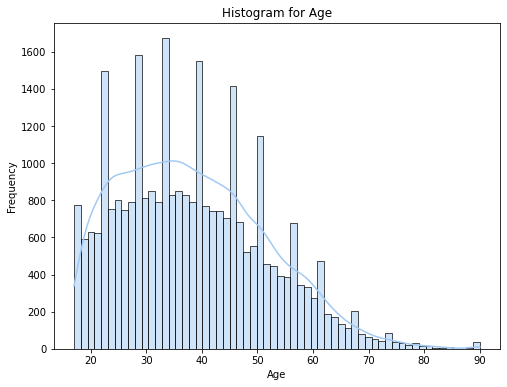

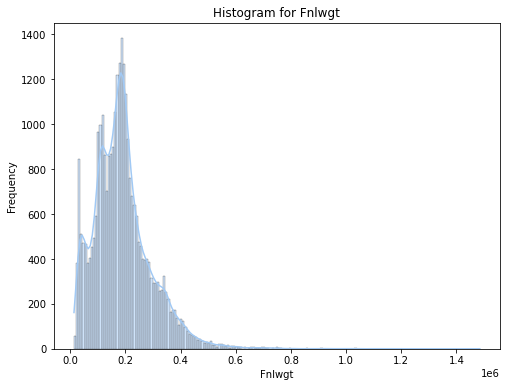

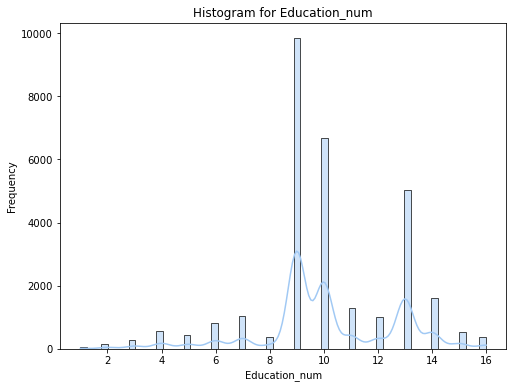

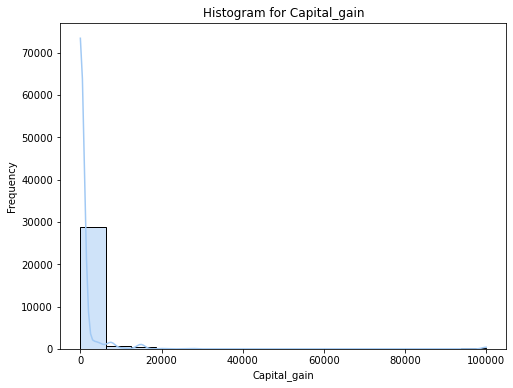

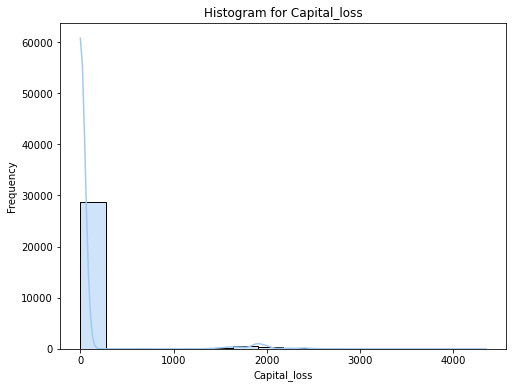

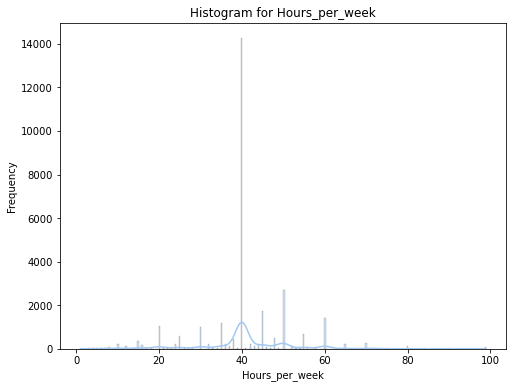

In [15]:
for feature in int_columns:
    plt.figure(figsize=(8, 6))
    sns.set_palette("pastel")  # Set a color palette
    sns.histplot(data=df, x=feature, kde=True)
    
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [16]:
high_income_data = X[df['Income'] ==' >50K']
print('Shape of Income with >50K DataFrame:', high_income_data.shape)
high_income_data

Shape of Income with >50K DataFrame: (7508, 14)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States
10,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32537,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States


Workclass : 

 Private             4876
 Self-emp-not-inc     714
 Local-gov            609
 Self-emp-inc         600
 Federal-gov          365
 State-gov            344
Name: Workclass, dtype: int64 




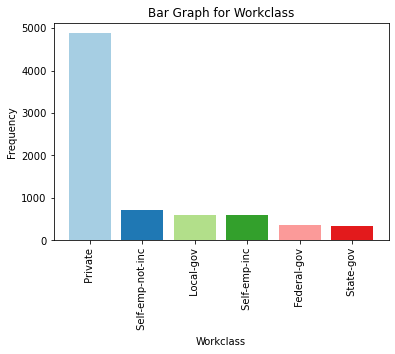

Education : 

 Bachelors       2126
 HS-grad         1617
 Some-college    1336
 Masters          918
 Prof-school      406
 Assoc-voc        344
 Doctorate        280
 Assoc-acdm       256
 10th              59
 11th              59
 7th-8th           35
 12th              29
 9th               25
 5th-6th           12
 1st-4th            6
Name: Education, dtype: int64 




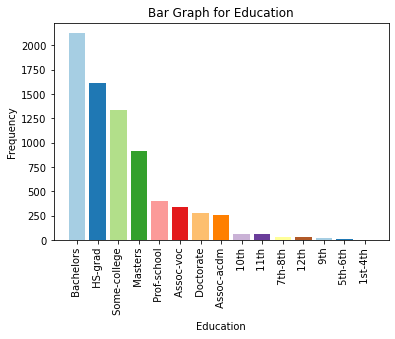

Marital_status : 

 Married-civ-spouse       6399
 Never-married             470
 Divorced                  452
 Widowed                    80
 Separated                  66
 Married-spouse-absent      31
 Married-AF-spouse          10
Name: Marital_status, dtype: int64 




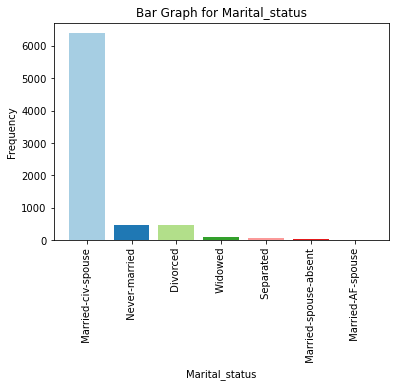

Occupation : 

 Exec-managerial      1937
 Prof-specialty       1811
 Sales                 970
 Craft-repair          908
 Adm-clerical          498
 Transport-moving      319
 Tech-support          278
 Machine-op-inspct     245
 Protective-serv       210
 Other-service         132
 Farming-fishing       115
 Handlers-cleaners      83
 Armed-Forces            1
 Priv-house-serv         1
Name: Occupation, dtype: int64 




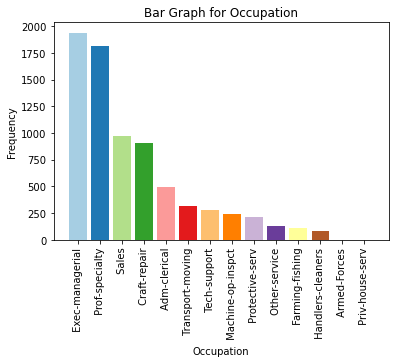

Relationship : 

 Husband           5679
 Not-in-family      823
 Wife               694
 Unmarried          213
 Own-child           64
 Other-relative      35
Name: Relationship, dtype: int64 




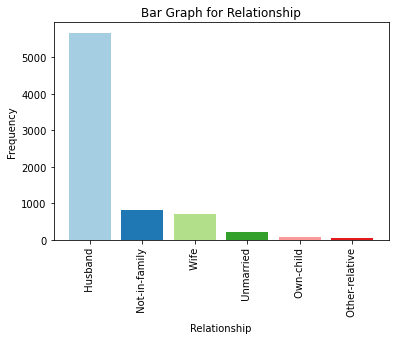

Race : 

 White                 6839
 Black                  366
 Asian-Pac-Islander     248
 Amer-Indian-Eskimo      34
 Other                   21
Name: Race, dtype: int64 




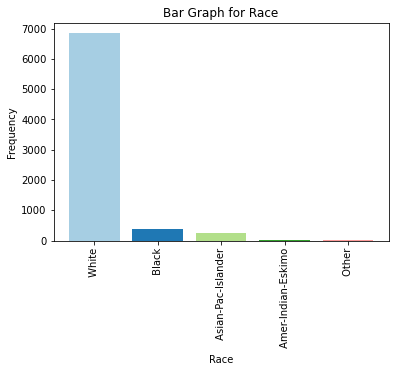

Sex : 

 Male      6396
 Female    1112
Name: Sex, dtype: int64 




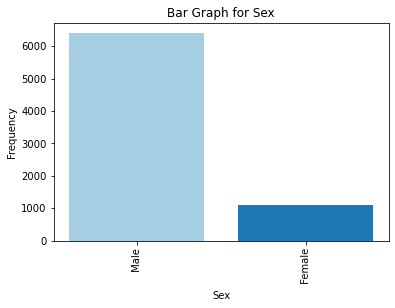

Native_country : 

 United-States         6995
 Philippines             60
 Germany                 44
 India                   40
 Canada                  36
 Mexico                  33
 England                 30
 Cuba                    25
 Italy                   24
 Japan                   23
 China                   20
 Taiwan                  19
 Iran                    18
 South                   14
 Puerto-Rico             12
 France                  12
 Poland                  11
 Jamaica                 10
 El-Salvador              9
 Greece                   8
 Cambodia                 7
 Yugoslavia               6
 Hong                     6
 Vietnam                  5
 Ireland                  5
 Portugal                 4
 Haiti                    4
 Ecuador                  4
 Guatemala                3
 Hungary                  3
 Thailand                 3
 Nicaragua                2
 Scotland                 2
 Trinadad&Tobago          2
 Laos                     2
 

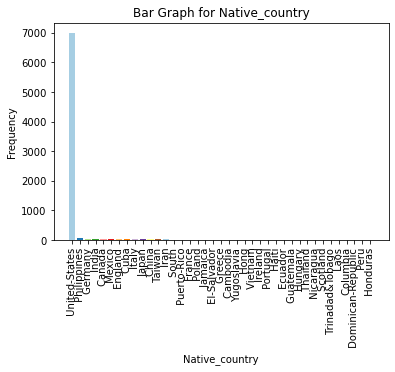

In [17]:
obj_col = high_income_data.select_dtypes(include='object')    
for col in obj_col:
    # Calculate the frequency of each category in the column
    value_counts = high_income_data[col].value_counts()
    print(col,': \n')
    print(value_counts,'\n\n')
    # Create a bar graph for the current column
    plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)
    
    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph for {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()

In [ ]:
## private work class are earning more in comparison to State government or others 
## People with Bachelors are earning more in Comparison to 1st-4th Statndard. 
## Exec-managerial position holders have higher income 
## White Race people have higher income. 

/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_1618/2289019737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


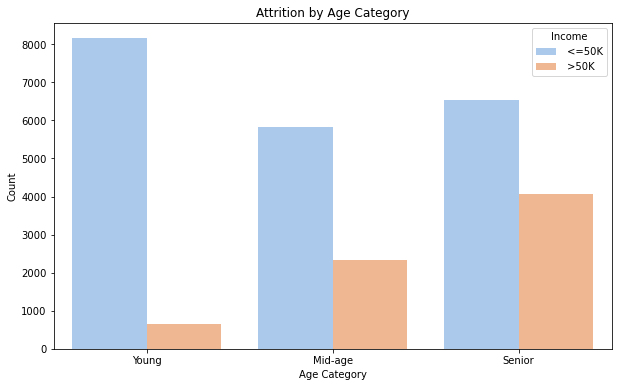

In [18]:
age_bins = [18, 30, 40, 60]
age_labels = ['Young', 'Mid-age', 'Senior']

# Create a new column 'AgeCategory' to represent age bins
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Plot the distribution of Attrition within each age bin
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeCategory', hue='Income')
plt.title('Attrition by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [ ]:
## Senior age group have higher incoem than freshers. 

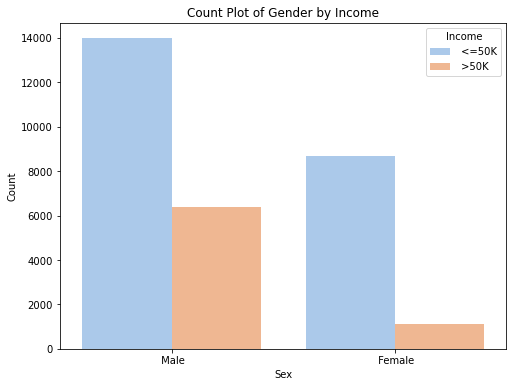

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Sex", hue="Income")
plt.title("Count Plot of Gender by Income")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [ ]:
## Male have higher income than feamles. 

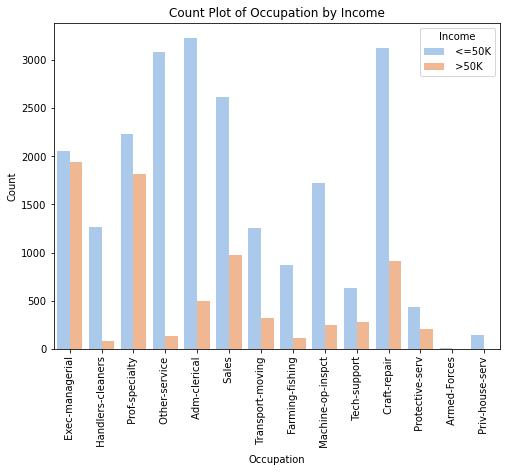

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Occupation", hue="Income")
plt.title("Count Plot of Occupation by Income")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Occupation of Craft repair have lower income. 
## Occupation of Exec-Mangerial position and Prof-speciality have higher income. 


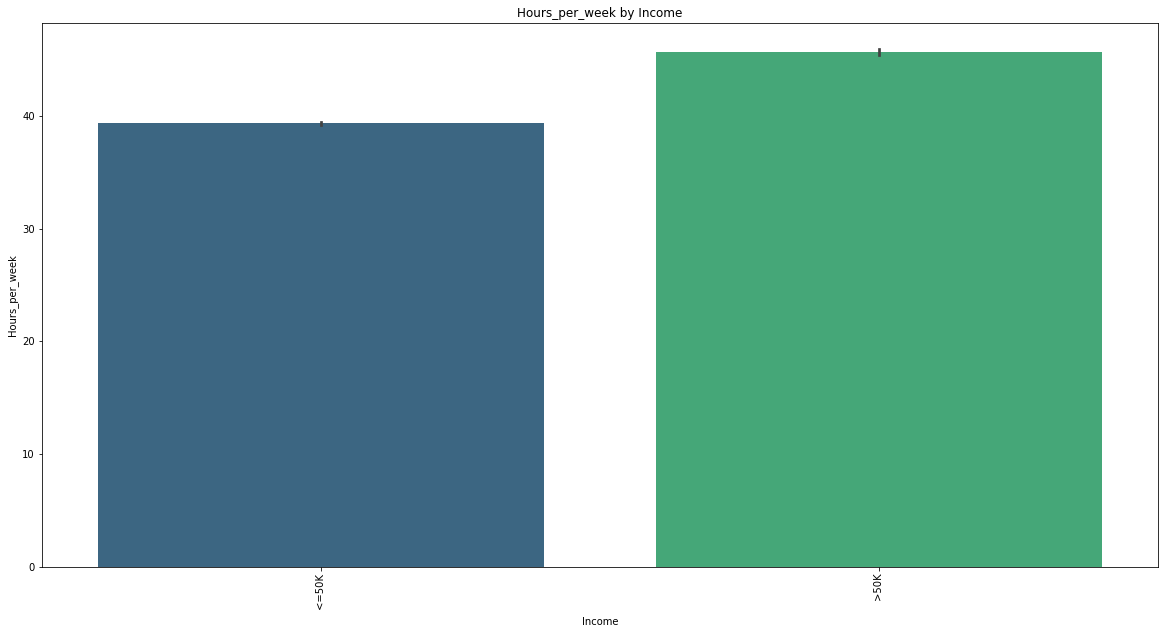

In [21]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Income', y='Hours_per_week', data=df,palette='viridis')
plt.title('Hours_per_week by Income')
plt.xlabel('Income')
plt.ylabel('Hours_per_week')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
## People are are working for more hours are earning more.

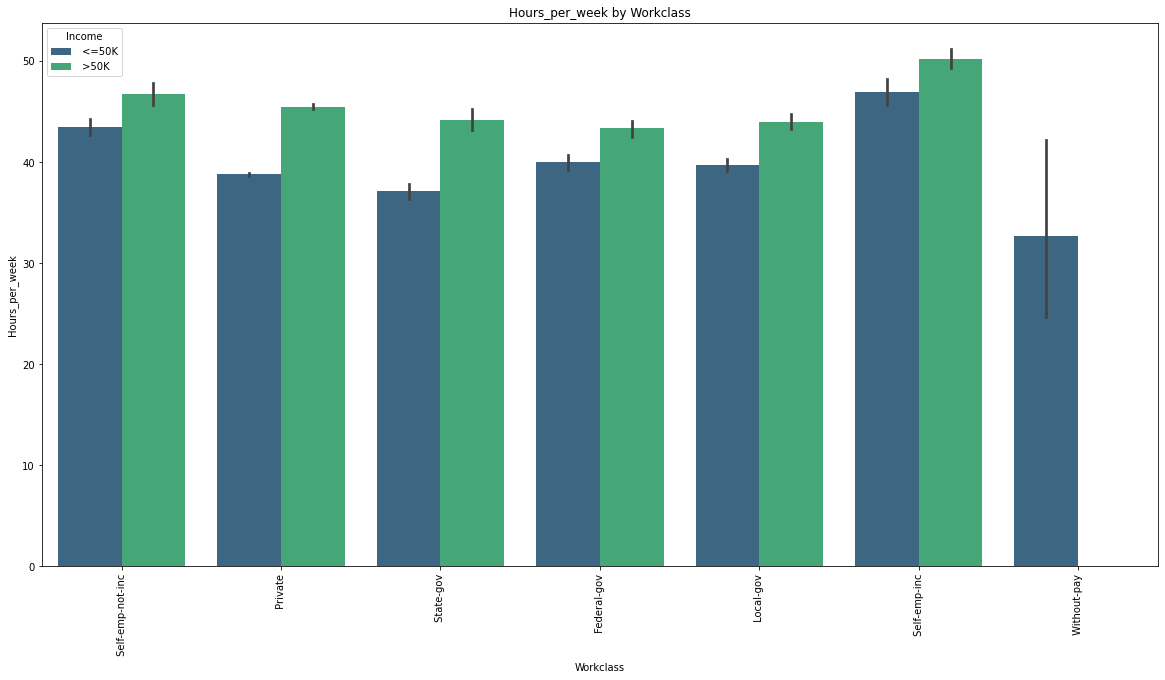

In [22]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Workclass', y='Hours_per_week', data=df, hue = 'Income',palette='viridis')
plt.title('Hours_per_week by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Hours_per_week')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

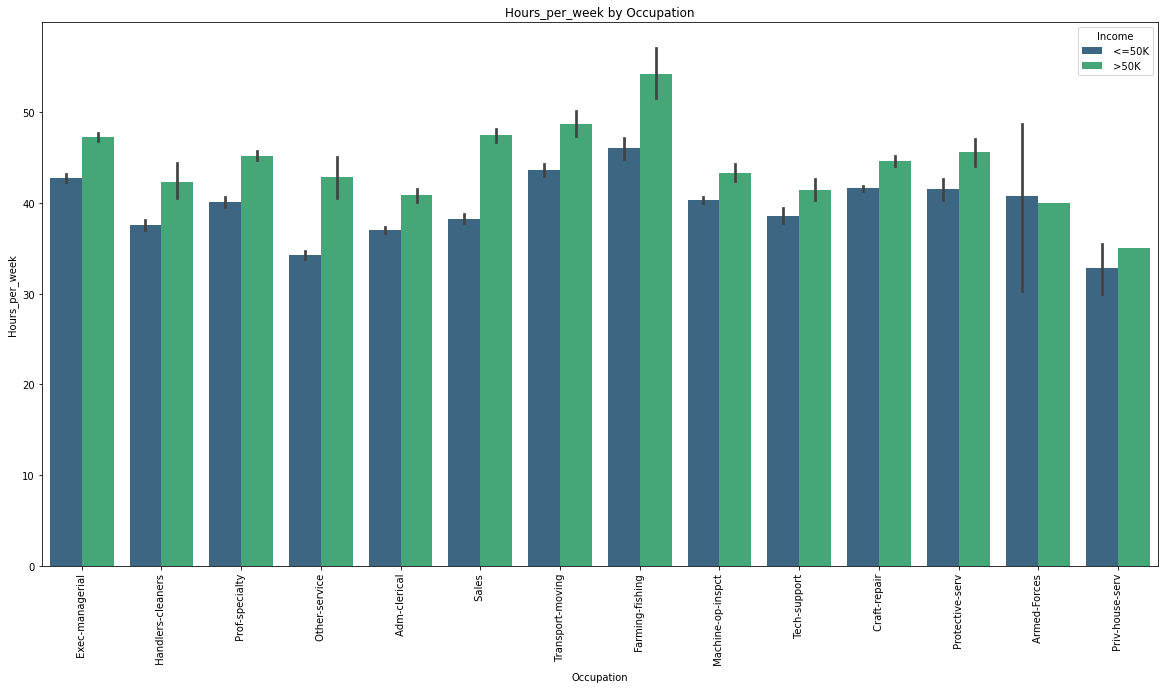

In [23]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Occupation', y='Hours_per_week', data=df, hue = 'Income', palette='viridis')
plt.title('Hours_per_week by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Hours_per_week')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
## Farming and Fishig demands more no of working hours but its also leading to higher income. 

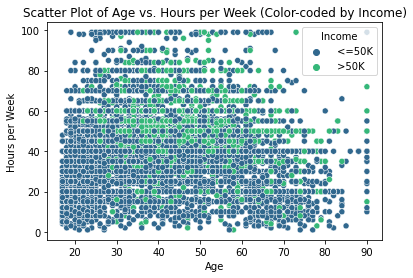

In [24]:
# Create a scatter plot
sns.scatterplot(data=df, x="Age", y="Hours_per_week", hue="Income", palette="viridis")

# Add labels and legend
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.title("Scatter Plot of Age vs. Hours per Week (Color-coded by Income)")
plt.legend(title="Income", loc="upper right")

# Show the plot
plt.show()

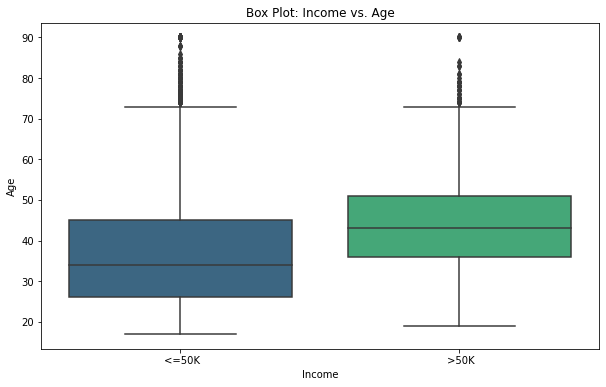

In [25]:
# Create a box plot to visualize the distribution of income with respect to age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Age', data=df, palette='viridis')
plt.title('Box Plot: Income vs. Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [ ]:
## For a lower income, Age is averaged at 35 whilst for higher incoem ag eis averaged at 45. 

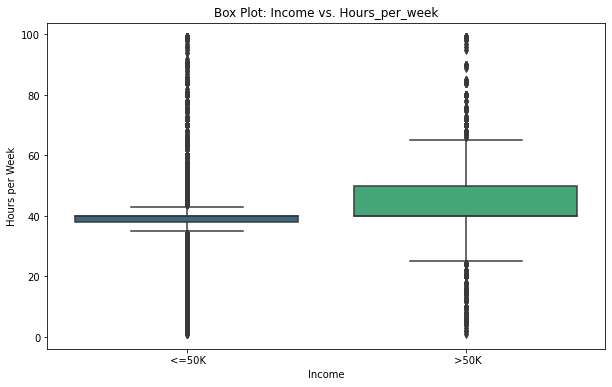

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Hours_per_week', data=df, palette='viridis')
plt.title('Box Plot: Income vs. Hours_per_week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

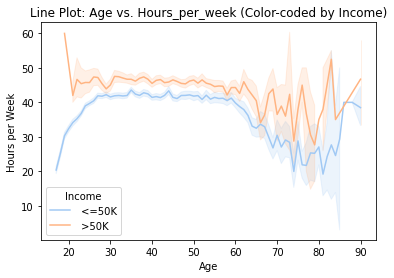

In [27]:
sns.lineplot(x='Age', y='Hours_per_week', hue='Income', data=df)
plt.title('Line Plot: Age vs. Hours_per_week (Color-coded by Income)')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title="Income")
plt.show()

In [ ]:
# The line plot does give in clarity how , Income is directly proportionated to Working hours and Age. 

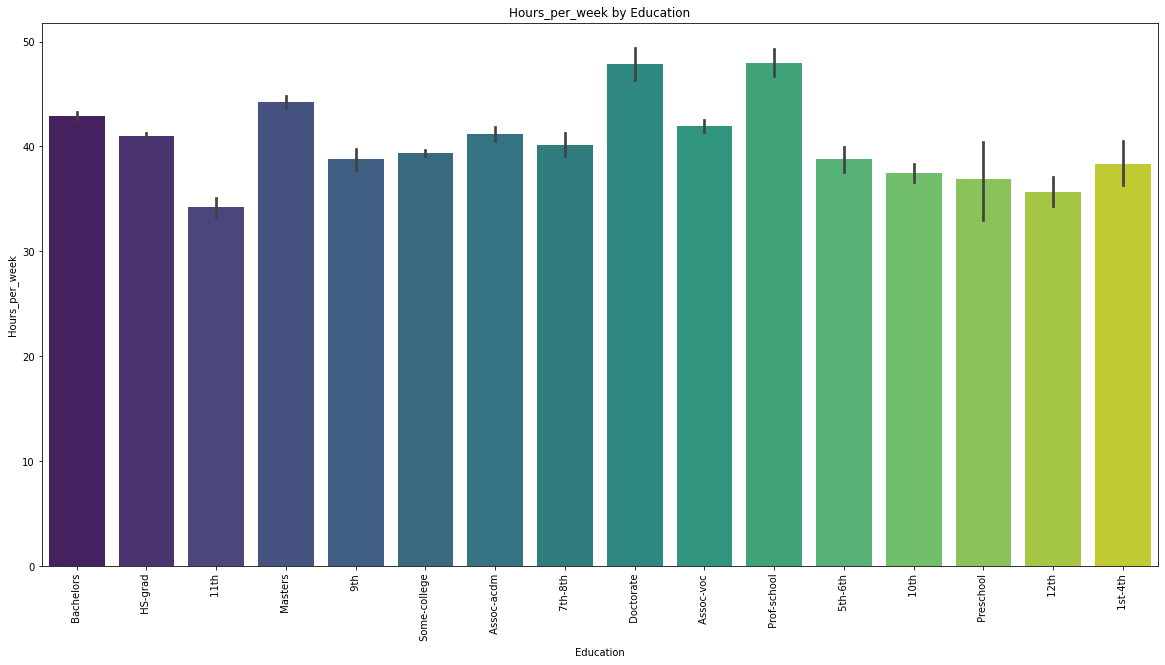

In [28]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Education', y='Hours_per_week', data=df, palette='viridis')
plt.title('Hours_per_week by Education')
plt.xlabel('Education')
plt.ylabel('Hours_per_week')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

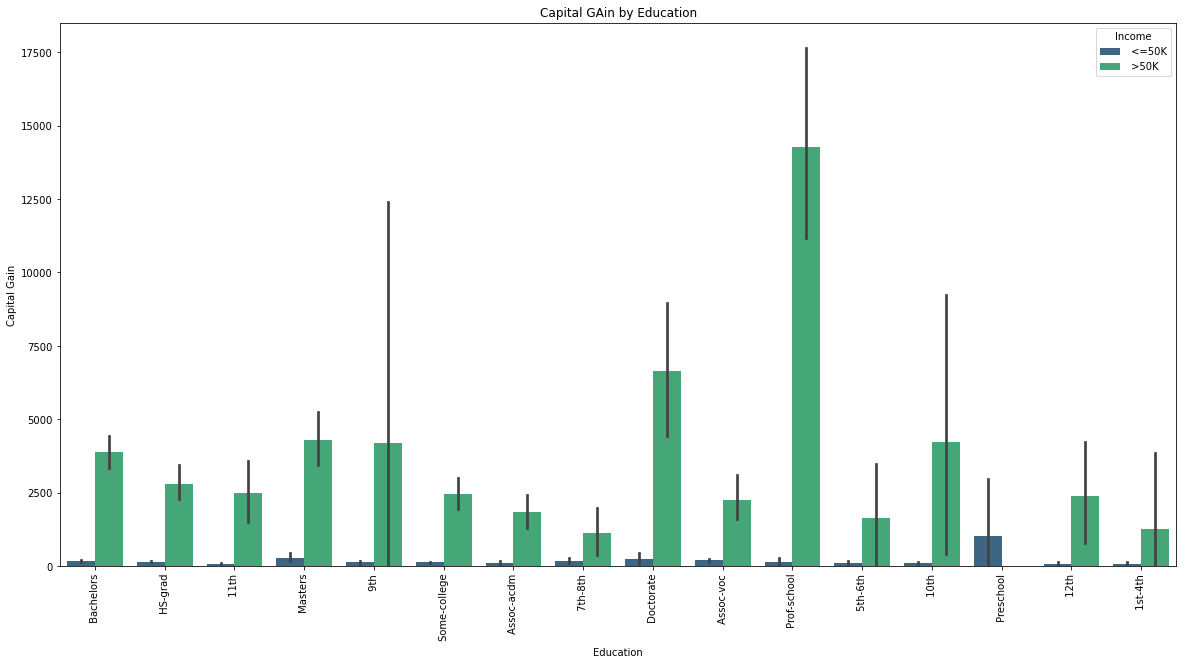

In [29]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Education', y='Capital_gain', data=df, hue = 'Income', palette='viridis')
plt.title('Capital GAin by Education')
plt.xlabel('Education')
plt.ylabel('Capital Gain')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
## Columns Education and Education num are the same columns. We can drop Education. 

In [ ]:
# Lets Convert Object columns to Numeric columns by Lable Encoder

In [30]:
from sklearn.preprocessing import LabelEncoder


# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Iterate through the columns and label encode categorical columns
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = label_encoder.fit_transform(df[column])


/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_1618/1857581402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])


In [31]:
df = df.drop(columns=['Education_num','AgeCategory'])

In [32]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df.iloc[outlier_indices]

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
3,28,2,338409,9,2,9,5,2,0,0,0,40,4,0
10,30,5,141297,9,2,9,0,1,1,0,0,40,18,1
51,47,2,51835,14,2,9,5,4,0,0,1902,60,15,1
83,44,2,343591,11,0,2,1,4,0,14344,0,40,38,1
111,56,4,335605,11,2,7,0,4,1,0,1887,50,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32499,34,2,60567,1,0,13,4,4,1,0,880,60,38,0
32507,45,2,155093,0,0,7,1,2,0,0,0,38,5,0
32537,38,2,139180,9,0,9,4,2,0,15020,0,45,38,1
32544,39,1,111499,7,2,0,5,4,0,0,0,20,38,1


In [33]:
# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]

# Filter the DataFrame to keep only non-outliers
df = df.iloc[non_outlier_indices]

In [34]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.081009,-0.081305,0.007749,-0.308232,-0.007779,-0.280326,0.046070,0.107479,0.067938,0.046302,0.119911,0.023192,0.244617
Workclass,0.081009,1.000000,-0.036492,0.017447,-0.033366,0.008626,-0.078987,0.069859,0.081553,0.018294,-0.000047,0.053659,0.017389,0.013801
Fnlwgt,-0.081305,-0.036492,1.000000,-0.030654,0.033655,0.003344,0.007118,-0.036374,0.028323,-0.008514,-0.010764,-0.022973,-0.078804,-0.010115
Education,0.007749,0.017447,-0.030654,1.000000,-0.034059,-0.032238,-0.009005,0.000143,-0.035603,0.025681,0.014250,0.058451,0.088773,0.072762
Marital_status,-0.308232,-0.033366,0.033655,-0.034059,1.000000,0.023376,0.199696,-0.083746,-0.124582,-0.040171,-0.037434,-0.188608,-0.028411,-0.192129
Occupation,-0.007779,0.008626,0.003344,-0.032238,0.023376,1.000000,-0.055503,0.005138,0.061649,0.016904,0.010863,0.013880,0.015165,0.051301
Relationship,-0.280326,-0.078987,0.007118,-0.009005,0.199696,-0.055503,1.000000,-0.111917,-0.578022,-0.084740,-0.092530,-0.273580,0.018701,-0.300198
Race,0.046070,0.069859,-0.036374,0.000143,-0.083746,0.005138,-0.111917,1.000000,0.082642,0.035684,0.050110,0.059144,0.041657,0.107892
Sex,0.107479,0.081553,0.028323,-0.035603,-0.124582,0.061649,-0.578022,0.082642,1.000000,0.068384,0.067995,0.235697,-0.026693,0.245874
Capital_gain,0.067938,0.018294,-0.008514,0.025681,-0.040171,0.016904,-0.084740,0.035684,0.068384,1.000000,-0.027973,0.074661,0.021934,0.205907


Text(0.5, 1.0, 'Correlation Heatmap')

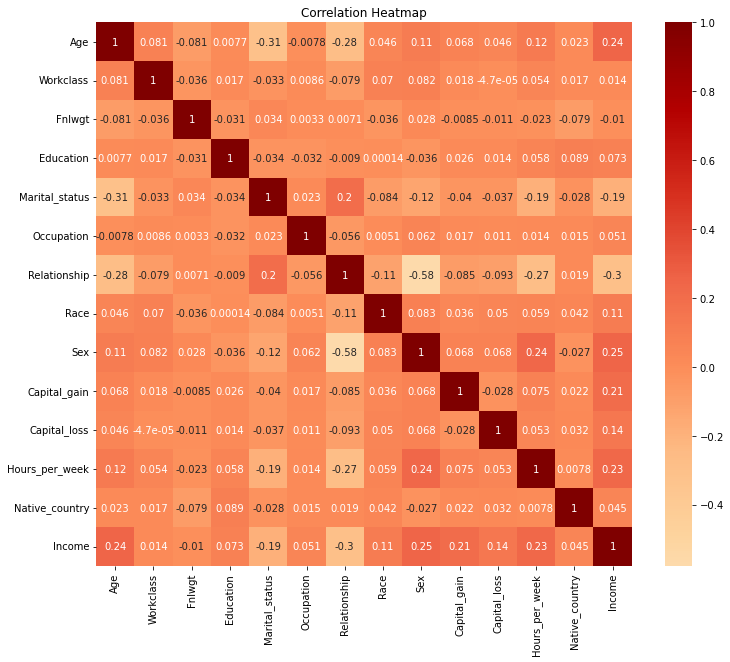

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='OrRd', center=0)

# Add title
plt.title('Correlation Heatmap')


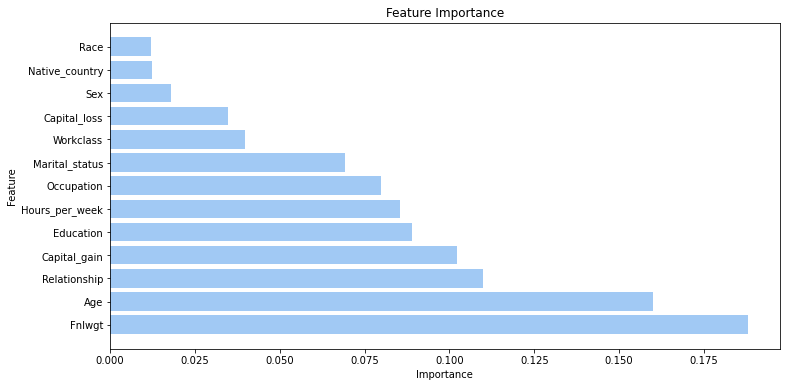

In [36]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to your data
X = df.drop(columns=['Income'])  # Assuming 'region' is your target column
y = df['Income']
clf.fit(X, y)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Model 1: Without feature importance

Model: DecisionTree



MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6529
           1       0.63      0.63      0.63      2067

    accuracy                           0.82      8596
   macro avg       0.76      0.76      0.76      8596
weighted avg       0.82      0.82      0.82      8596
 





Confusion Matrix:
[[5751  778]
 [ 760 1307]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.81, Status: Overfitting


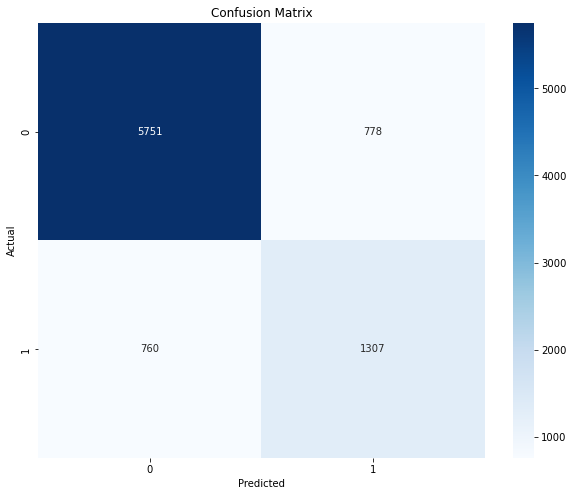

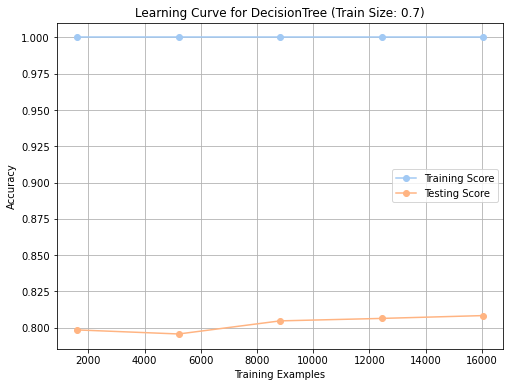

Cross-Validation Scores for DecisionTree: [0.80544408 0.80526959 0.8117257  0.81937173 0.81064572]
Mean CV Score for DecisionTree: 0.8104913633729544





MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4334
           1       0.61      0.63      0.62      1397

    accuracy                           0.81      5731
   macro avg       0.75      0.75      0.75      5731
weighted avg       0.81      0.81      0.81      5731
 





Confusion Matrix:
[[3775  559]
 [ 519  878]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.81, Status: Overfitting


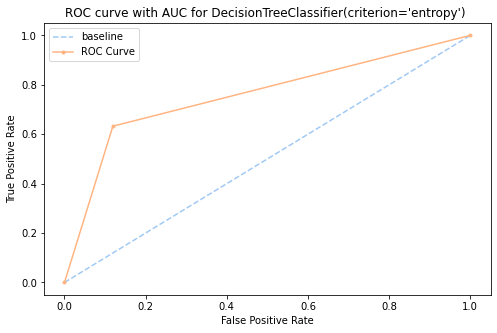

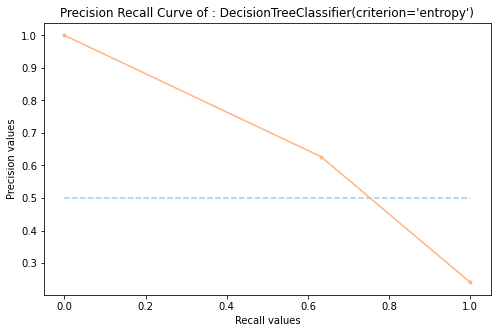

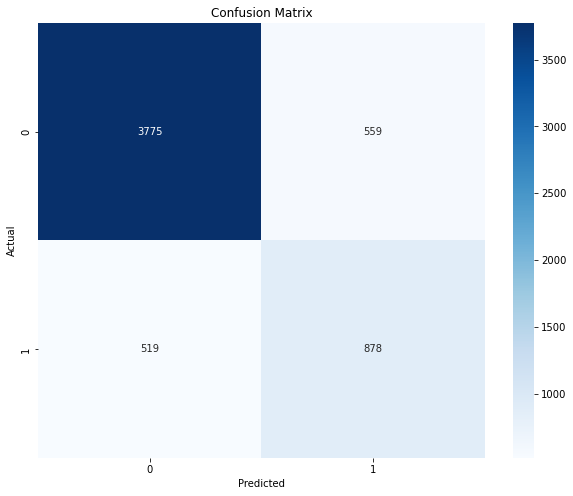

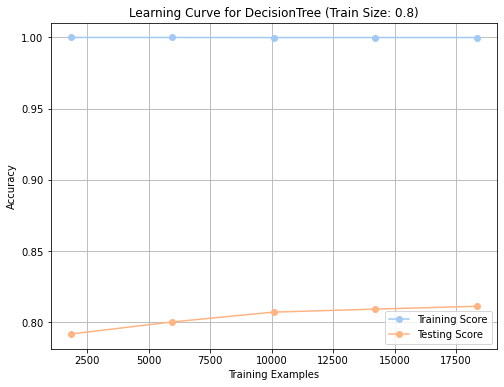

Cross-Validation Scores for DecisionTree: [0.80596754 0.8050951  0.81381958 0.81780105 0.80471204]
Mean CV Score for DecisionTree: 0.809479061702635


Model: RandomForest



MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6529
           1       0.75      0.62      0.68      2067

    accuracy                           0.86      8596
   macro avg       0.82      0.78      0.79      8596
weighted avg       0.85      0.86      0.85      8596
 





Confusion Matrix:
[[6114  415]
 [ 794 1273]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.86, Status: Overfitting


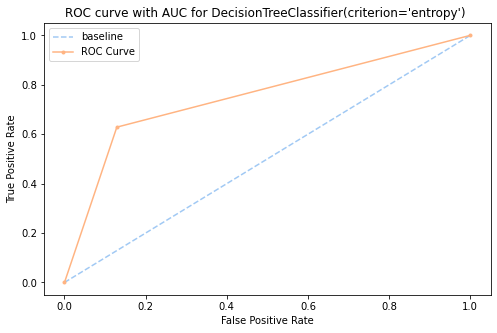

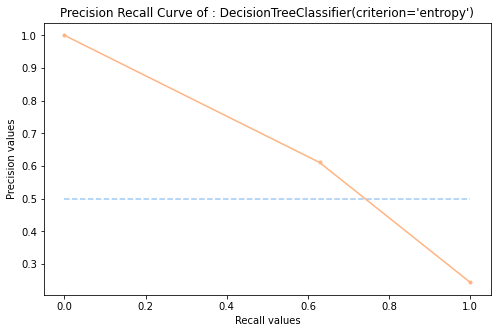

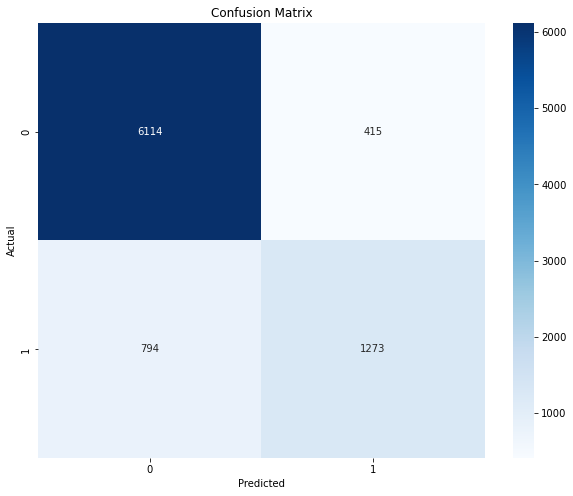

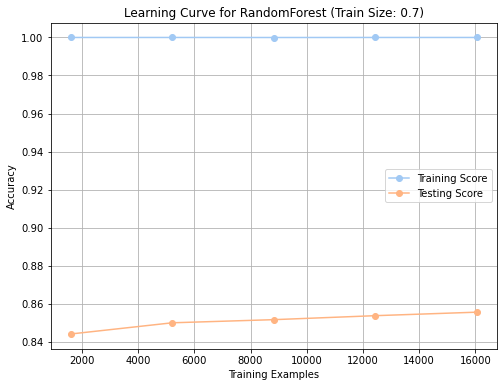

Cross-Validation Scores for RandomForest: [0.85656953 0.85185831 0.85691851 0.86020942 0.86265271]
Mean CV Score for RandomForest: 0.8576416982072639





MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4334
           1       0.76      0.61      0.68      1397

    accuracy                           0.86      5731
   macro avg       0.82      0.78      0.79      5731
weighted avg       0.85      0.86      0.85      5731
 





Confusion Matrix:
[[4063  271]
 [ 541  856]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.86, Status: Overfitting


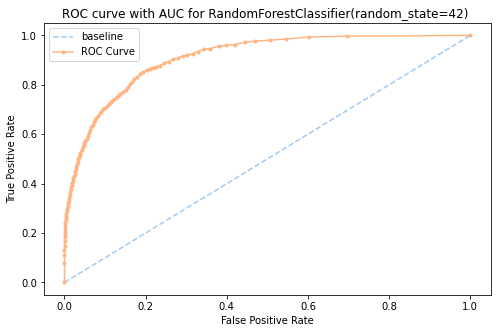

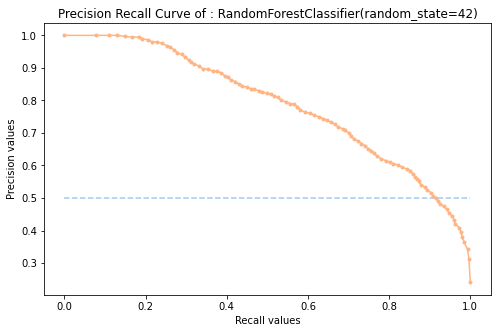

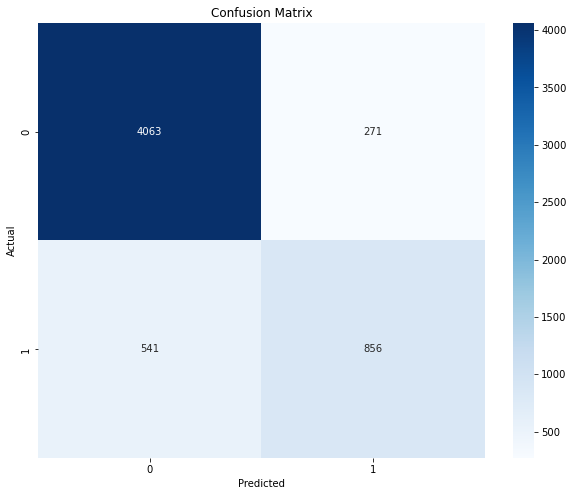

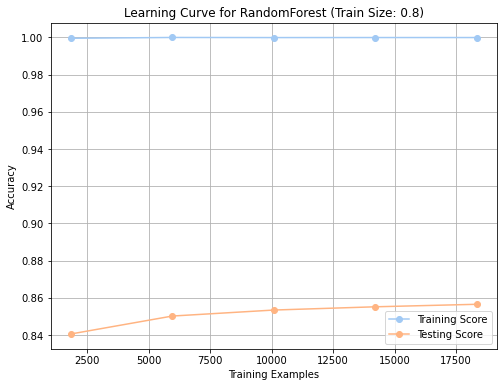

Cross-Validation Scores for RandomForest: [0.85656953 0.85185831 0.85691851 0.86020942 0.86265271]
Mean CV Score for RandomForest: 0.8576416982072639


Model: KNeighbors



MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6529
           1       0.63      0.59      0.61      2067

    accuracy                           0.82      8596
   macro avg       0.75      0.74      0.75      8596
weighted avg       0.81      0.82      0.82      8596
 





Confusion Matrix:
[[5811  718]
 [ 843 1224]]
Train Size: 0.7, Train Score: 0.90, Test Score: 0.82, Status: Overfitting


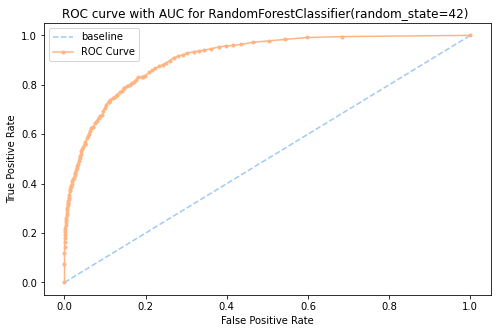

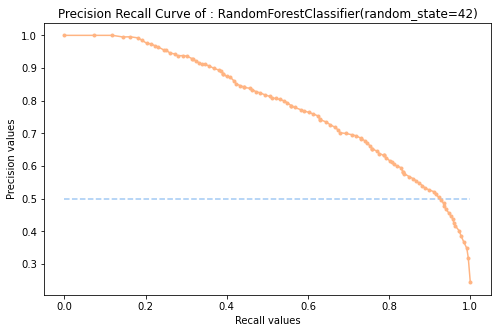

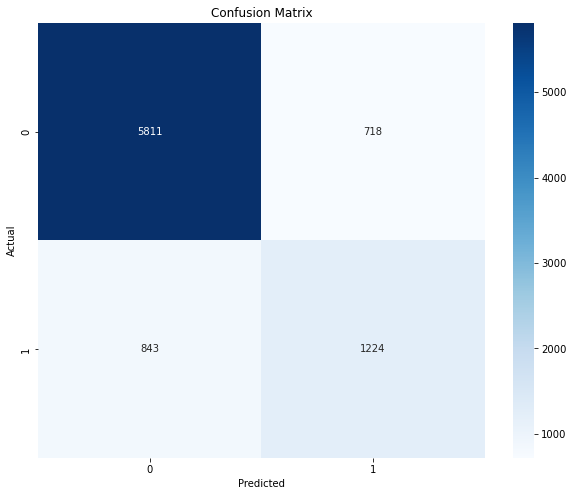

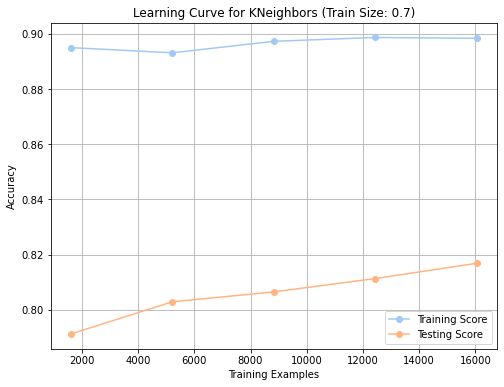

Cross-Validation Scores for KNeighbors: [0.8167859  0.81451754 0.82463793 0.81989529 0.82321117]
Mean CV Score for KNeighbors: 0.8198095657461959





MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4334
           1       0.62      0.59      0.61      1397

    accuracy                           0.81      5731
   macro avg       0.75      0.74      0.74      5731
weighted avg       0.81      0.81      0.81      5731
 





Confusion Matrix:
[[3834  500]
 [ 574  823]]
Train Size: 0.8, Train Score: 0.90, Test Score: 0.82, Status: Overfitting


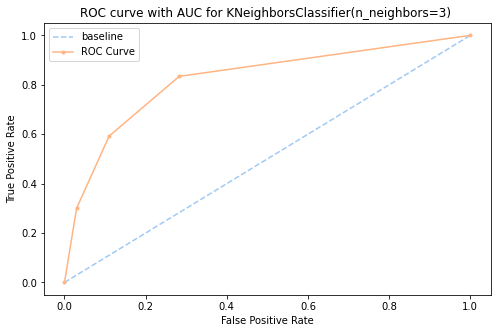

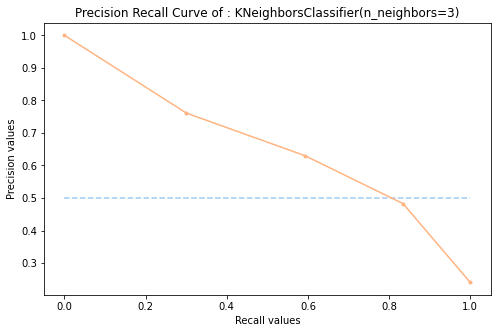

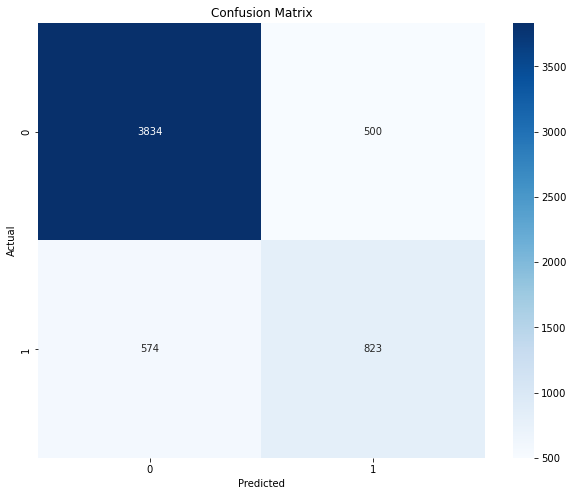

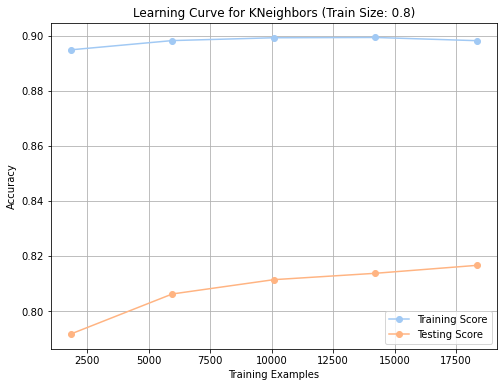

Cross-Validation Scores for KNeighbors: [0.8167859  0.81451754 0.82463793 0.81989529 0.82321117]
Mean CV Score for KNeighbors: 0.8198095657461959


Model: LogisticRegression



MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.81      0.95      0.88      6529
           1       0.68      0.31      0.43      2067

    accuracy                           0.80      8596
   macro avg       0.75      0.63      0.65      8596
weighted avg       0.78      0.80      0.77      8596
 





Confusion Matrix:
[[6218  311]
 [1417  650]]
Train Size: 0.7, Train Score: 0.80, Test Score: 0.80, Status: Good Fit


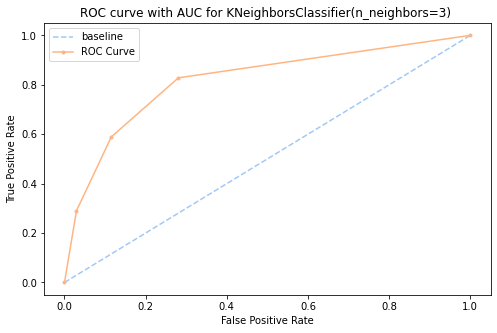

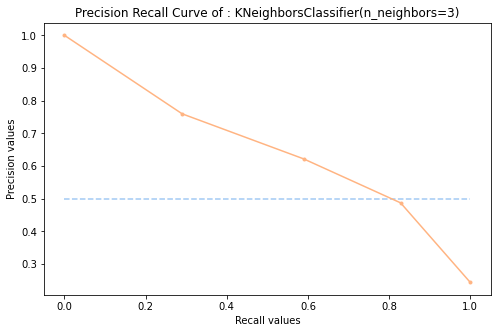

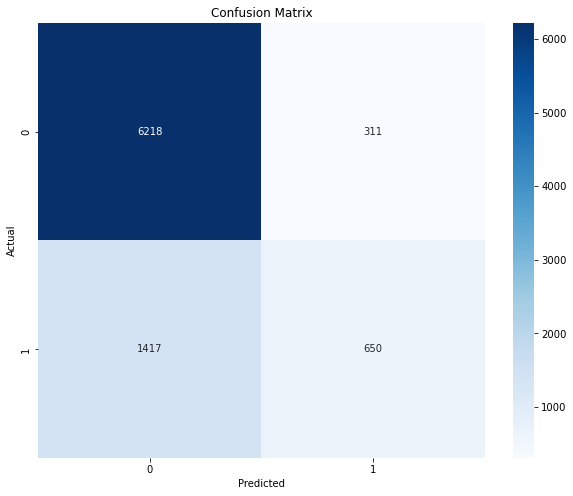

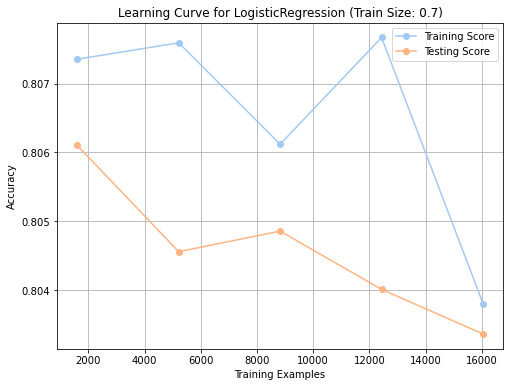

Cross-Validation Scores for LogisticRegression: [0.80631652 0.7932298  0.80718897 0.80157068 0.80471204]
Mean CV Score for LogisticRegression: 0.8026036043525566





MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4334
           1       0.69      0.31      0.43      1397

    accuracy                           0.80      5731
   macro avg       0.75      0.63      0.65      5731
weighted avg       0.78      0.80      0.77      5731
 





Confusion Matrix:
[[4136  198]
 [ 958  439]]
Train Size: 0.8, Train Score: 0.80, Test Score: 0.80, Status: Good Fit


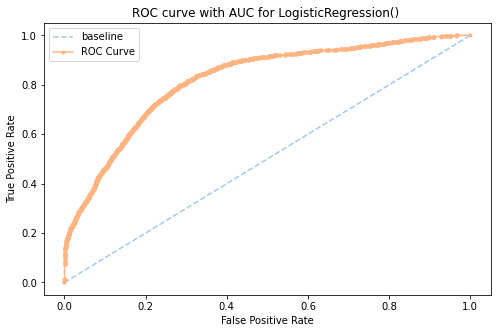

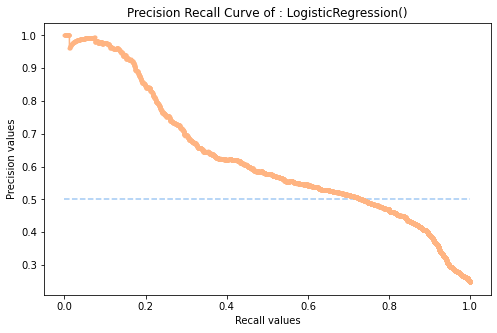

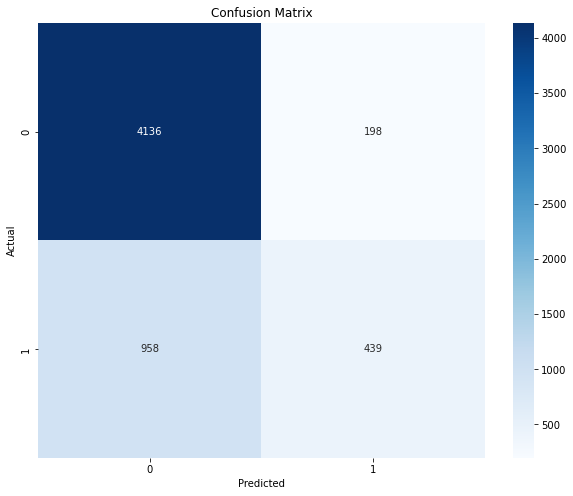

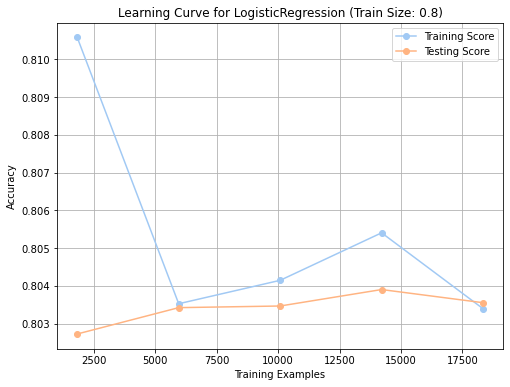

Cross-Validation Scores for LogisticRegression: [0.80631652 0.7932298  0.80718897 0.80157068 0.80471204]
Mean CV Score for LogisticRegression: 0.8026036043525566


Model: Xgboost



MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   s

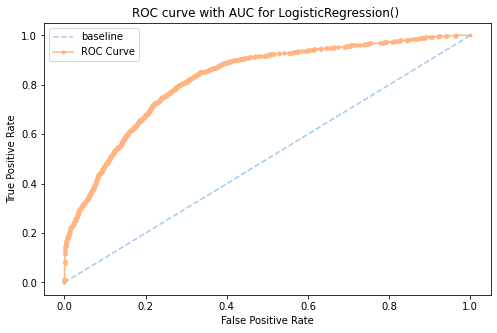

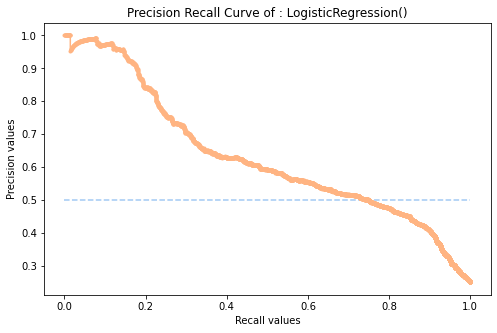

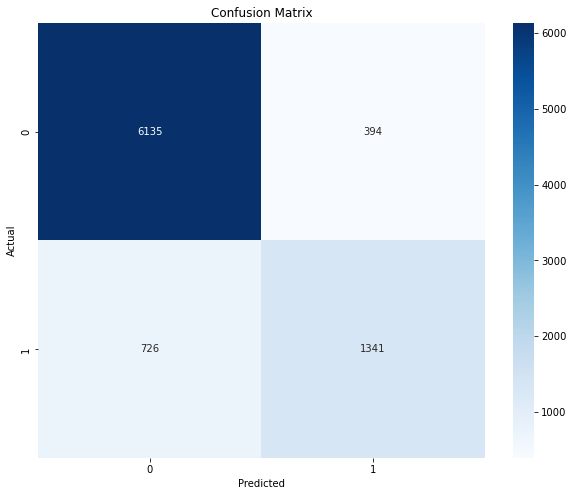

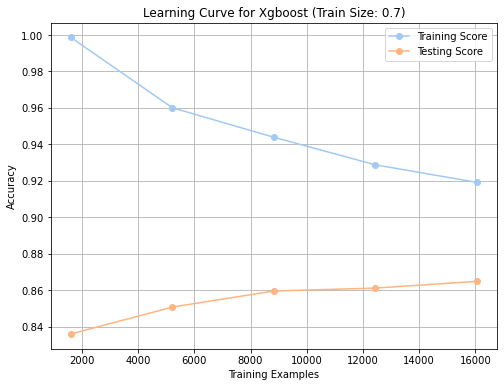

Cross-Validation Scores for Xgboost: [0.86197871 0.86756238 0.86616646 0.87225131 0.86928447]
Mean CV Score for Xgboost: 0.8674486664029528





MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   support

           0       0.89      

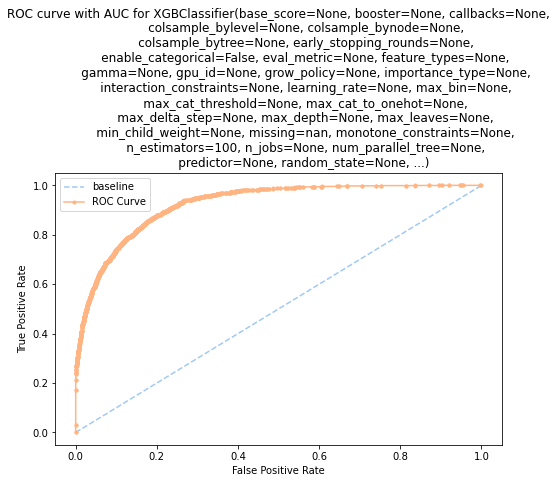

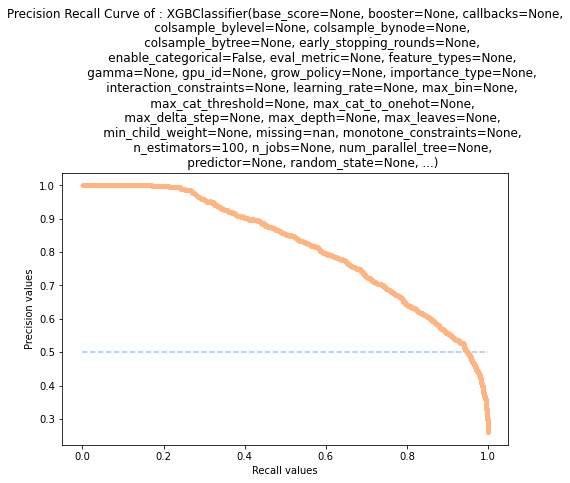

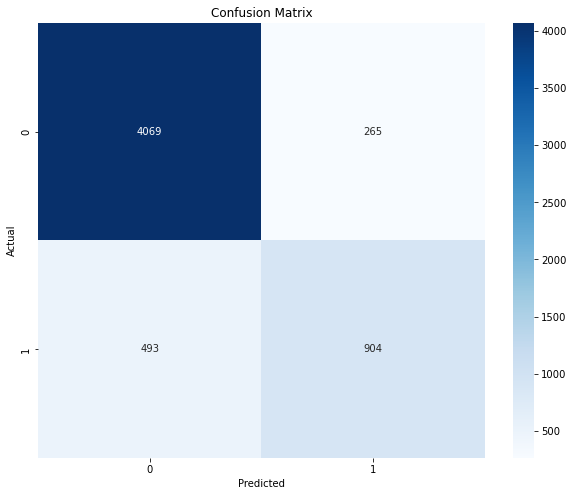

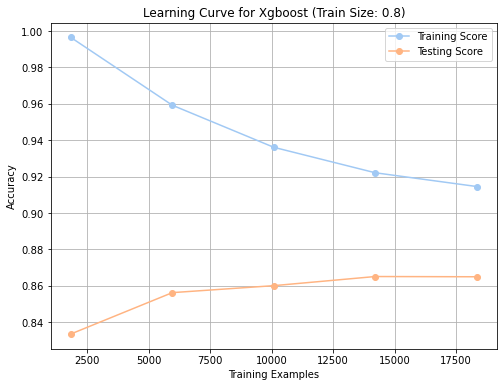

Cross-Validation Scores for Xgboost: [0.86197871 0.86756238 0.86616646 0.87225131 0.86928447]
Mean CV Score for Xgboost: 0.8674486664029528




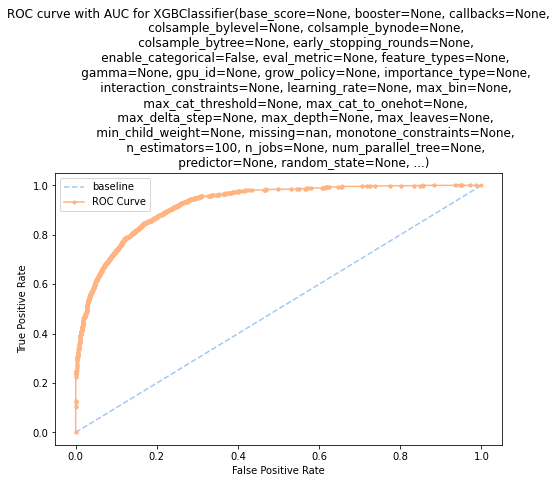

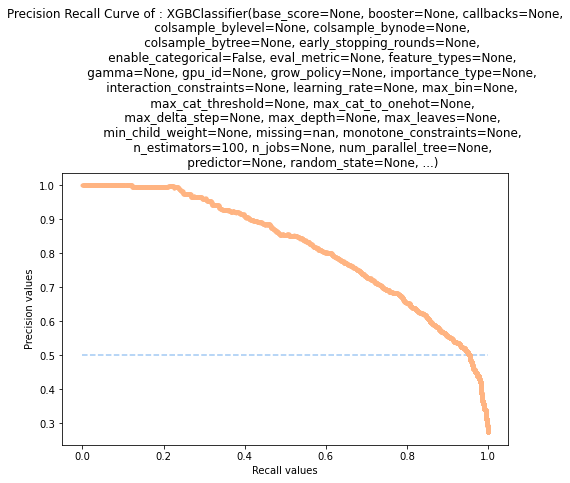

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn import metrics




X = df.drop(columns = ['Income']) ## Since, type has the least Feature importance


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a list of models to evaluate
models = [
    ('DecisionTree', DecisionTreeClassifier(criterion='entropy')),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=3)),
    ('LogisticRegression',LogisticRegression()), #Logistic Regression
    ('Xgboost',XGBClassifier())
]


model_score = []
acc_list = []
auc_roc=[] 
b_auc=[]
auc_pc=[]
ap=[]
f1=[]

for model_name, model in models:
    print(f"Model: {model_name}")
    train_sizes = [0.7, 0.8]
    
    for train_size in train_sizes: 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        
        model.fit(X_train,y_train)
    
    
        y_pred = model.predict(X_test)
       
        print("\n\n\nMODEL NAME : ",model,"\n\n\n\n")
    
        print((classification_report(y_test, y_pred)),"\n\n\n")
    
        confusion = confusion_matrix(y_test, y_pred)
        print('\n\nConfusion Matrix:')
        print(confusion)
        
        
    
        model_score.append(model.score(X_train,y_train))
        acc_list.append(accuracy_score(y_test,y_pred))
        
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate mean training and testing scores across folds
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
    
    # Check for overfitting or underfitting
        if abs(train_scores_mean[-1] - test_scores_mean[-1]) < 0.05:
            status = "Good Fit"
        elif train_scores_mean[-1] > test_scores_mean[-1]:
            status = "Overfitting"
        else:
            status = "Underfitting"
    
    # Print the results
        print(f"Train Size: {train_size}, Train Score: {train_scores_mean[-1]:.2f}, Test Score: {test_scores_mean[-1]:.2f}, Status: {status}")
        
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        
    # Plot learning curves
        plt.figure(figsize=(8, 6))
        plt.title(f'Learning Curve for {model_name} (Train Size: {train_size})')
        plt.xlabel('Training Examples')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Score')
        plt.legend(loc='best')
        plt.show()

## Plot ROC AUC Curve    
        baseline_probs = [0 for _ in range(len(y_test))] # generate a baseline prediction (majority class)
        probs = model.predict_proba(X_test) # predict probabilities
        probs = probs[:, 1] # keep probabilities for the positive outcome only
        auc_roc.append(roc_auc_score(y_test, probs)) # calculate scores
        b_auc.append(roc_auc_score(y_test,baseline_probs))
        fpr, tpr, thresholds = roc_curve(y_test, probs) # calculate roc curve
        bl_fpr, bl_tpr, thresholds = roc_curve(y_test, baseline_probs)    
        fig = plt.figure(figsize=(8,5)) # plot the roc curve for the model
        plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
        plt.plot(fpr, tpr, marker='.',label='ROC Curve')
        plt.title("ROC curve with AUC for {} ".format(model)) # plot title
        plt.xlabel("False Positive Rate") # axis labels
        plt.ylabel("True Positive Rate")
        plt.legend()
        
        
        # predict probabilities
        probs = model.predict_proba(X_test)
        probs = probs[:,1] # keep probabilities for the positive outcome only    
        prediction = model.predict(X_test) # predict class values
        precision, recall,thresholds = precision_recall_curve(y_test, probs)
        auc_pc.append(metrics.auc(recall, precision))
        f1.append(f1_score(y_test, prediction))
        ap.append(average_precision_score(y_test, probs))    
        fig = plt.figure(figsize=(8,5)) # plot the precision-recall curves
        plt.ylabel("Precision values")
        plt.xlabel("Recall values")  
        plt.title("Precision Recall Curve of : %s"%model)
        plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
        plt.plot(recall, precision, marker='.',label="PR curve")

        
        
    
    # Perform cross-validation to get a more robust evaluation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        print(f"Cross-Validation Scores for {model_name}:", cv_scores)
        print(f"Mean CV Score for {model_name}:", np.mean(cv_scores))
        print("\n")    

In [39]:
model_list=['Decision Tree Classifier(0.7)','Decision Tree Classifier(0.8)','Random Forest Classifier(0.7)','Random Forest Classifier(0.8)','KNN Classifier(0.7)','KNN Classifier(0.8)',
           'Logistic Regression(0.7)','Logistic Regression(0.8)','XGBoost Classifier(0.7)','Xgboost Classifier(0.8)']

result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

,Model,Model_score,Accuracy,roc_auc_score,f1-score,precision-recall AUC,average precision score
0,Decision Tree Classifier(0.7),1.000000,0.821080,0.756578,0.629576,0.673795,0.484787
1,Decision Tree Classifier(0.8),0.999956,0.811900,0.749755,0.619619,0.665022,0.474564
2,Random Forest Classifier(0.7),0.999950,0.859353,0.909932,0.678029,0.789218,0.786373
3,Random Forest Classifier(0.8),0.999956,0.858314,0.908551,0.678288,0.789250,0.786333
4,KNN Classifier(0.7),0.897941,0.818404,0.821189,0.610626,0.662136,0.569227
5,KNN Classifier(0.8),0.897260,0.812598,0.816663,0.605147,0.657267,0.564815
6,Logistic Regression(0.7),0.803460,0.798976,0.819562,0.429326,0.624749,0.624855
7,Logistic Regression(0.8),0.803289,0.798290,0.824629,0.431662,0.632263,0.632421
8,XGBoost Classifier(0.7),0.913447,0.869707,0.923901,0.705418,0.815969,0.816013
9,Xgboost Classifier(0.8),0.907731,0.867737,0.922701,0.704599,0.817554,0.817619


## Model 2 : dropping features with least importance count. Race, Native_country. 

Model: DecisionTree



MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6529
           1       0.62      0.62      0.62      2067

    accuracy                           0.82      8596
   macro avg       0.75      0.75      0.75      8596
weighted avg       0.82      0.82      0.82      8596
 





Confusion Matrix:
[[5736  793]
 [ 778 1289]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.81, Status: Overfitting


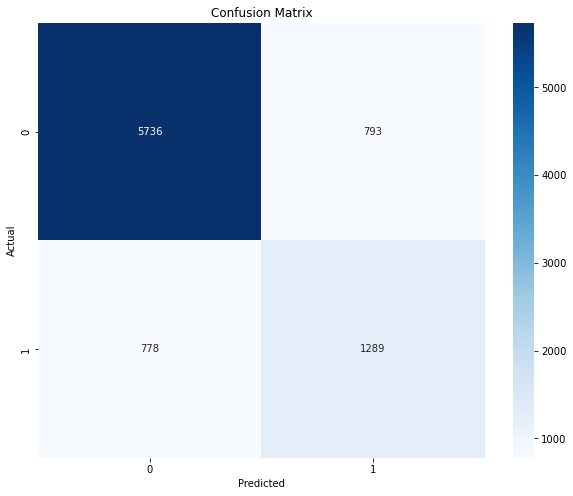

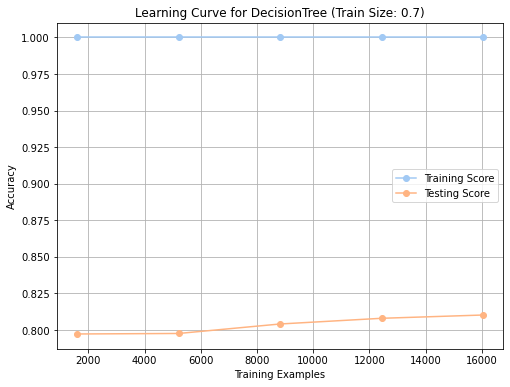

Cross-Validation Scores for DecisionTree: [0.80963183 0.80631652 0.81085325 0.81169284 0.80244328]
Mean CV Score for DecisionTree: 0.8081875461917869





MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4334
           1       0.62      0.63      0.62      1397

    accuracy                           0.82      5731
   macro avg       0.75      0.75      0.75      5731
weighted avg       0.82      0.82      0.82      5731
 





Confusion Matrix:
[[3797  537]
 [ 519  878]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.81, Status: Overfitting


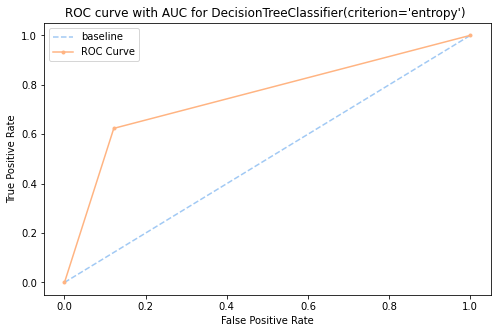

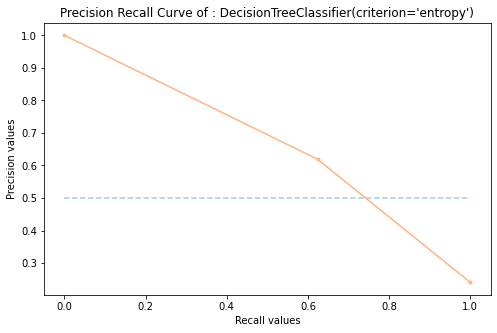

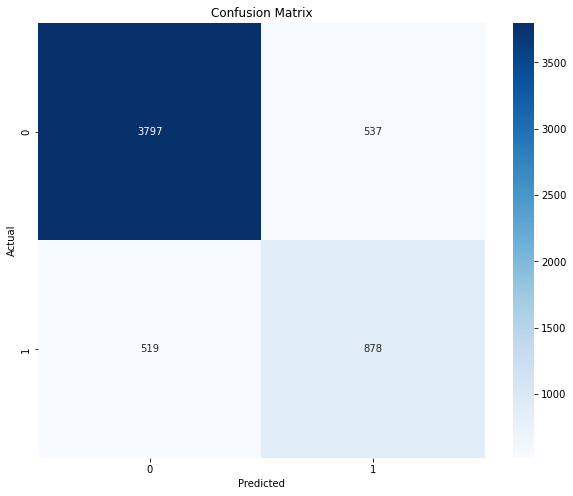

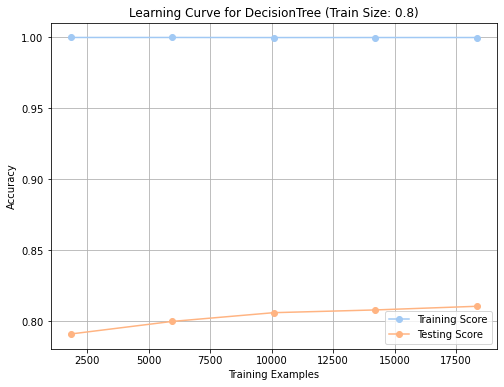

Cross-Validation Scores for DecisionTree: [0.80893387 0.80300122 0.81399407 0.81116928 0.80383944]
Mean CV Score for DecisionTree: 0.8081875766437273


Model: RandomForest



MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6529
           1       0.75      0.62      0.67      2067

    accuracy                           0.86      8596
   macro avg       0.82      0.77      0.79      8596
weighted avg       0.85      0.86      0.85      8596
 





Confusion Matrix:
[[6095  434]
 [ 794 1273]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.85, Status: Overfitting


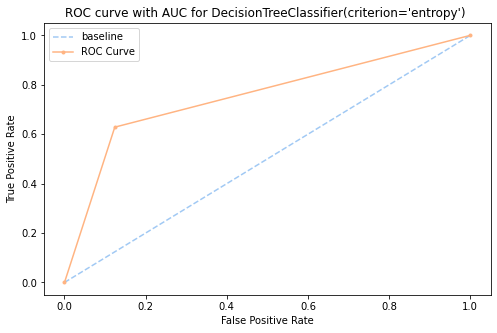

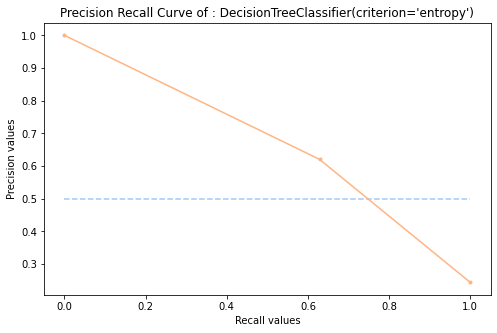

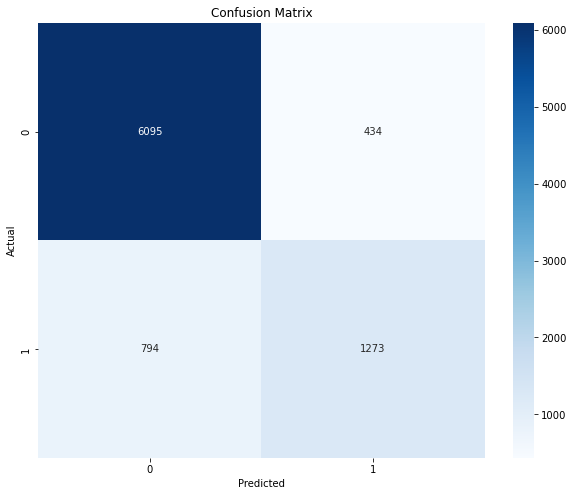

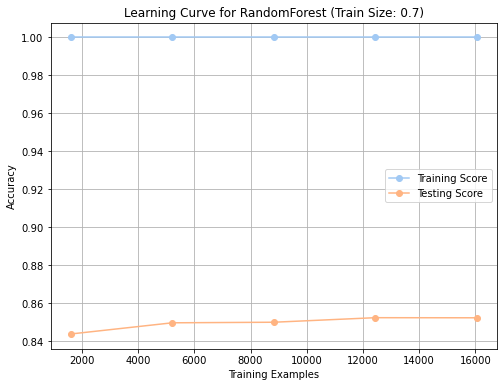

Cross-Validation Scores for RandomForest: [0.85168382 0.85133485 0.85604607 0.8556719  0.85933682]
Mean CV Score for RandomForest: 0.8548146923303438





MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4334
           1       0.74      0.61      0.67      1397

    accuracy                           0.85      5731
   macro avg       0.81      0.77      0.78      5731
weighted avg       0.85      0.85      0.85      5731
 





Confusion Matrix:
[[4034  300]
 [ 551  846]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.86, Status: Overfitting


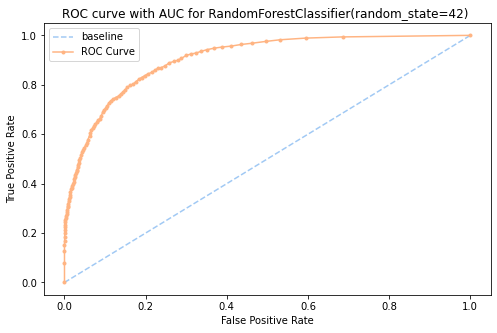

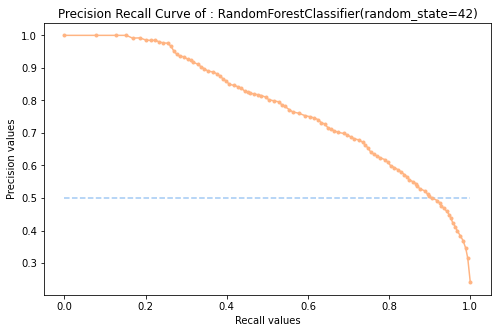

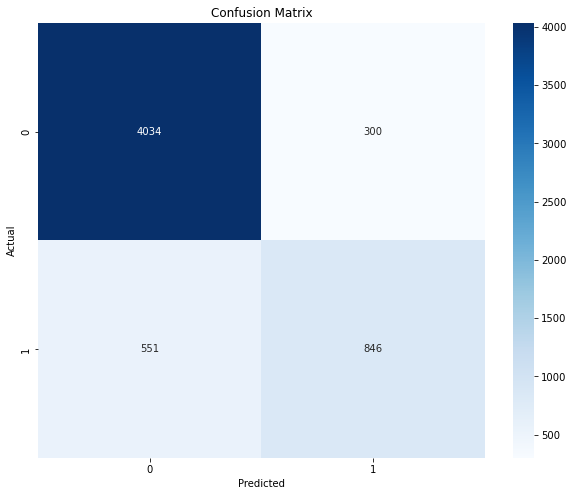

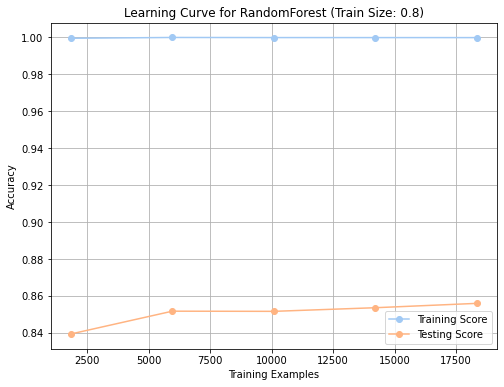

Cross-Validation Scores for RandomForest: [0.85168382 0.85133485 0.85604607 0.8556719  0.85933682]
Mean CV Score for RandomForest: 0.8548146923303438


Model: KNeighbors



MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6529
           1       0.63      0.60      0.61      2067

    accuracy                           0.82      8596
   macro avg       0.75      0.74      0.75      8596
weighted avg       0.82      0.82      0.82      8596
 





Confusion Matrix:
[[5809  720]
 [ 833 1234]]
Train Size: 0.7, Train Score: 0.90, Test Score: 0.82, Status: Overfitting


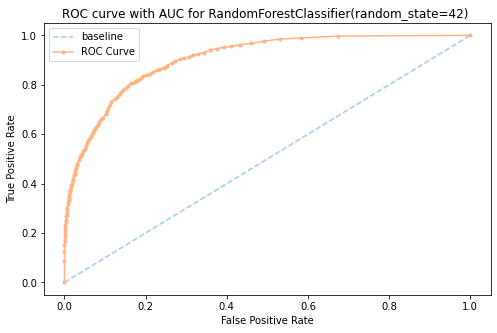

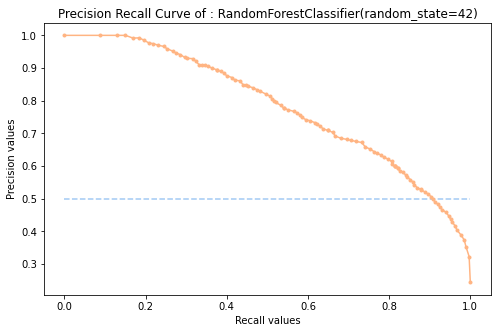

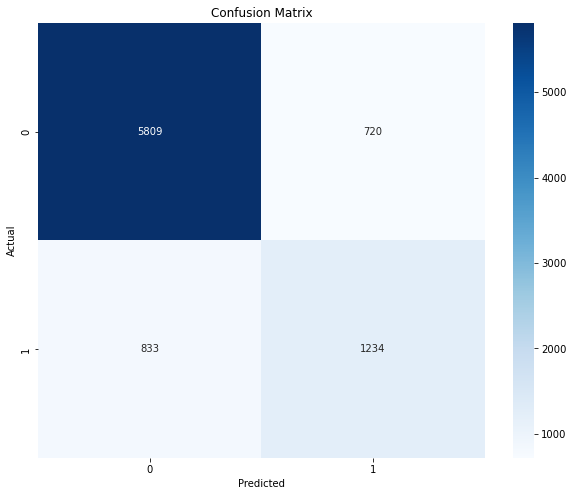

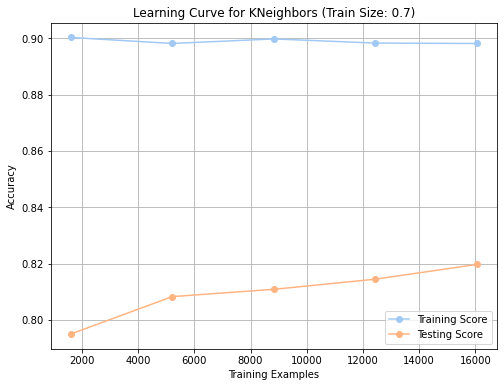

Cross-Validation Scores for KNeighbors: [0.81870529 0.8167859  0.82533589 0.82198953 0.82356021]
Mean CV Score for KNeighbors: 0.8212753638017176





MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4334
           1       0.62      0.59      0.61      1397

    accuracy                           0.81      5731
   macro avg       0.75      0.74      0.74      5731
weighted avg       0.81      0.81      0.81      5731
 





Confusion Matrix:
[[3832  502]
 [ 568  829]]
Train Size: 0.8, Train Score: 0.90, Test Score: 0.82, Status: Overfitting


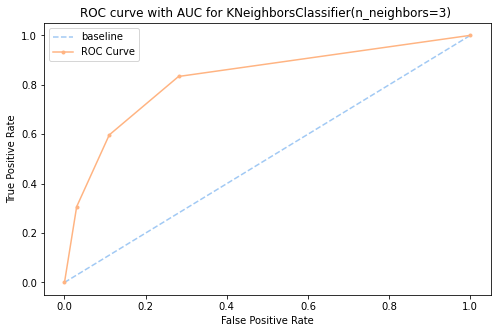

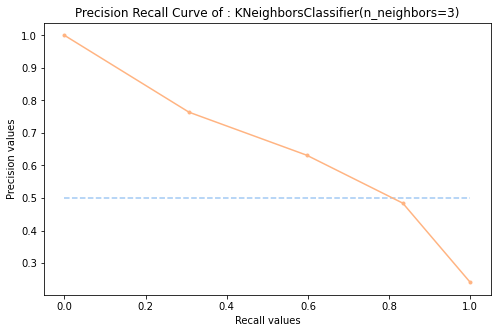

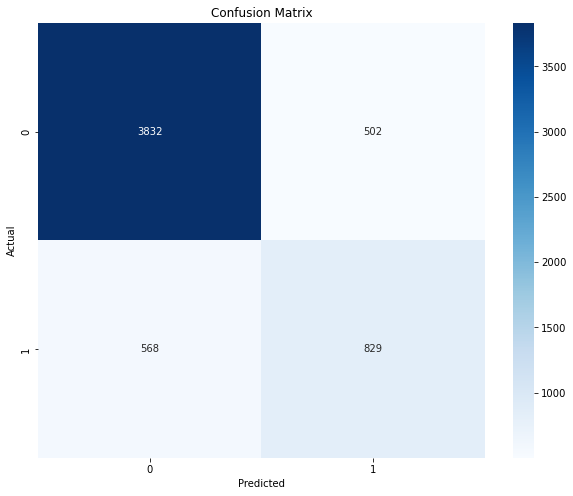

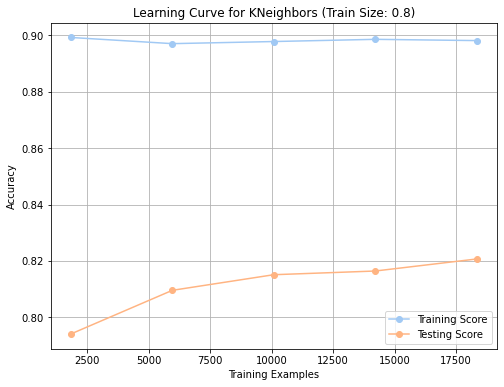

Cross-Validation Scores for KNeighbors: [0.81870529 0.8167859  0.82533589 0.82198953 0.82356021]
Mean CV Score for KNeighbors: 0.8212753638017176


Model: LogisticRegression



MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.81      0.95      0.88      6529
           1       0.68      0.31      0.42      2067

    accuracy                           0.80      8596
   macro avg       0.75      0.63      0.65      8596
weighted avg       0.78      0.80      0.77      8596
 





Confusion Matrix:
[[6228  301]
 [1429  638]]
Train Size: 0.7, Train Score: 0.80, Test Score: 0.80, Status: Good Fit


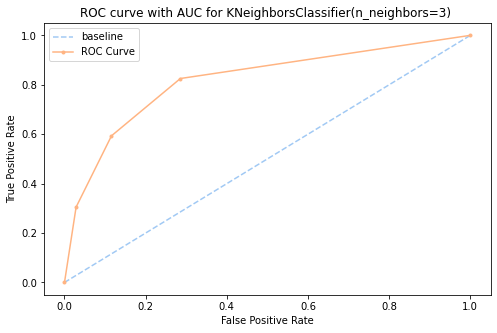

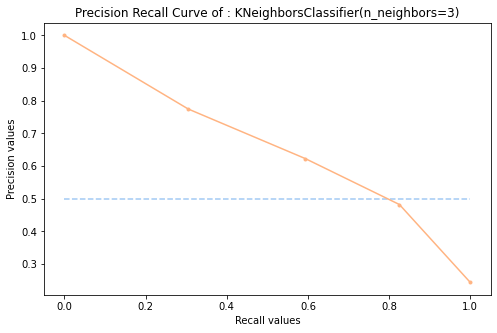

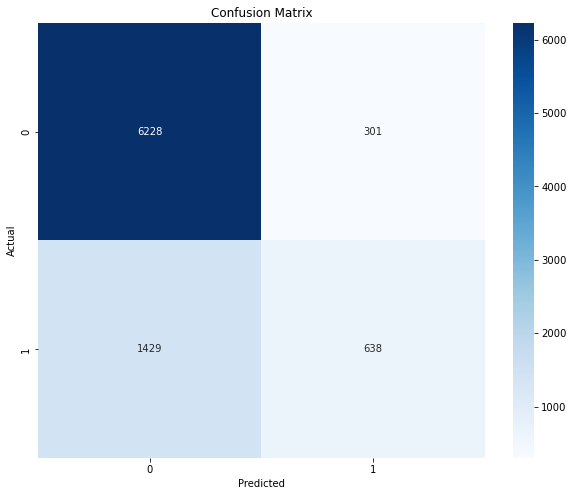

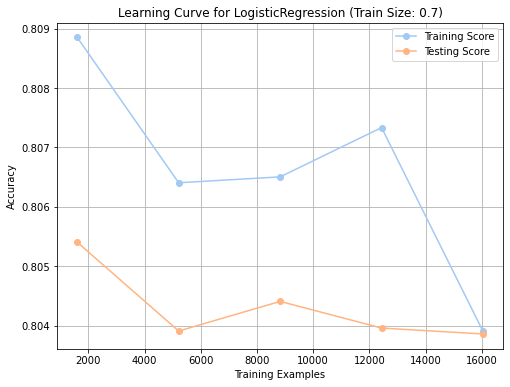

Cross-Validation Scores for LogisticRegression: [0.80579306 0.79375327 0.80631652 0.80191972 0.804363  ]
Mean CV Score for LogisticRegression: 0.802429114734689





MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4334
           1       0.69      0.31      0.43      1397

    accuracy                           0.80      5731
   macro avg       0.75      0.63      0.65      5731
weighted avg       0.78      0.80      0.77      5731
 





Confusion Matrix:
[[4143  191]
 [ 966  431]]
Train Size: 0.8, Train Score: 0.80, Test Score: 0.80, Status: Good Fit


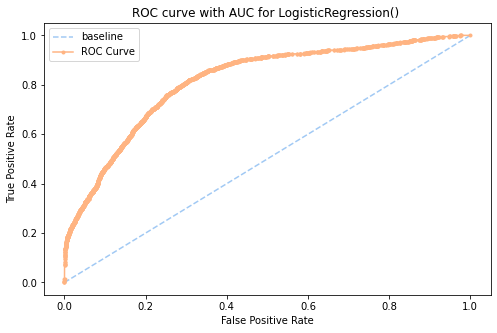

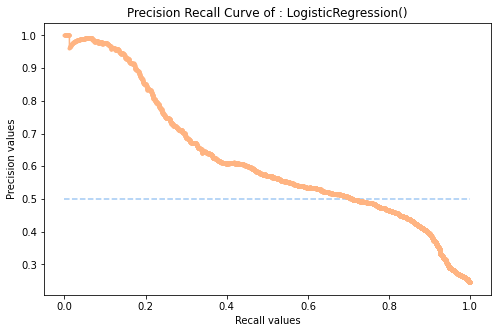

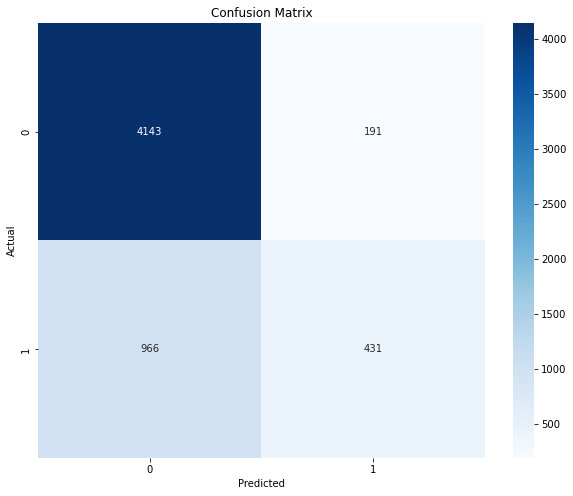

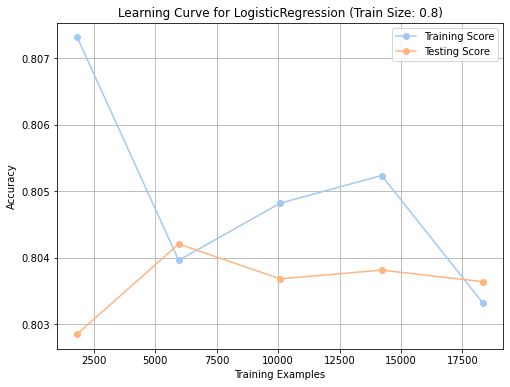

Cross-Validation Scores for LogisticRegression: [0.80579306 0.79375327 0.80631652 0.80191972 0.804363  ]
Mean CV Score for LogisticRegression: 0.802429114734689


Model: Xgboost



MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   su

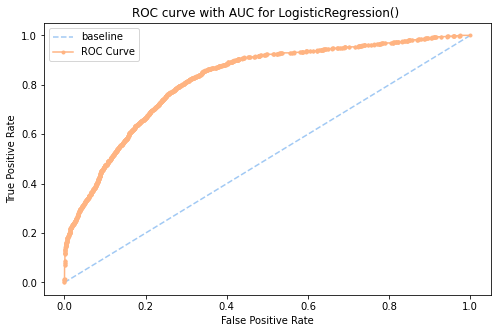

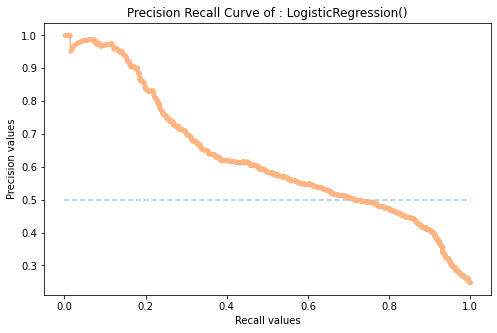

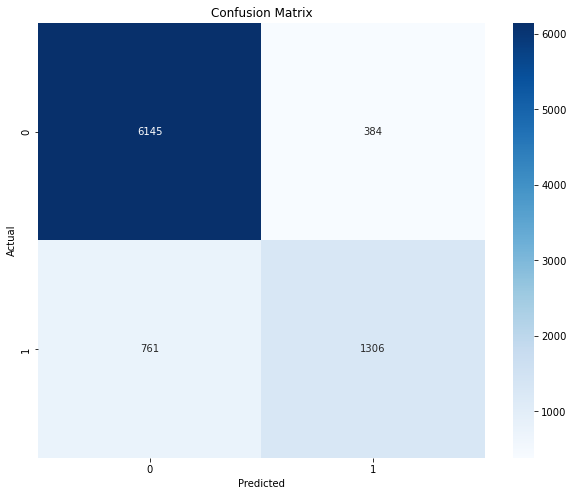

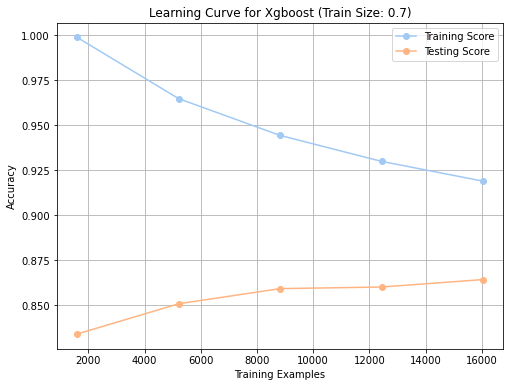

Cross-Validation Scores for Xgboost: [0.86302565 0.86459606 0.86494504 0.87242583 0.87050611]
Mean CV Score for Xgboost: 0.8670997358903219





MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   support

           0       0.89      

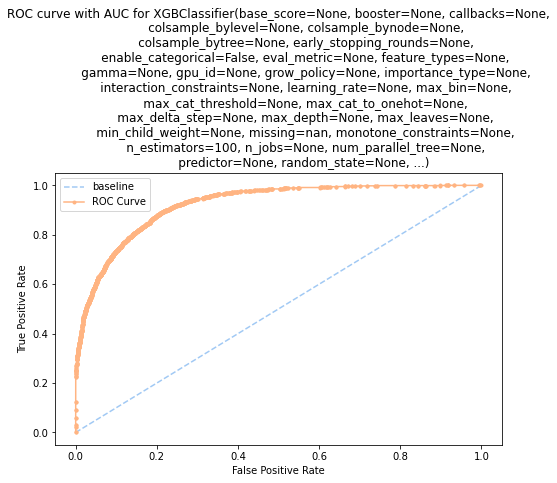

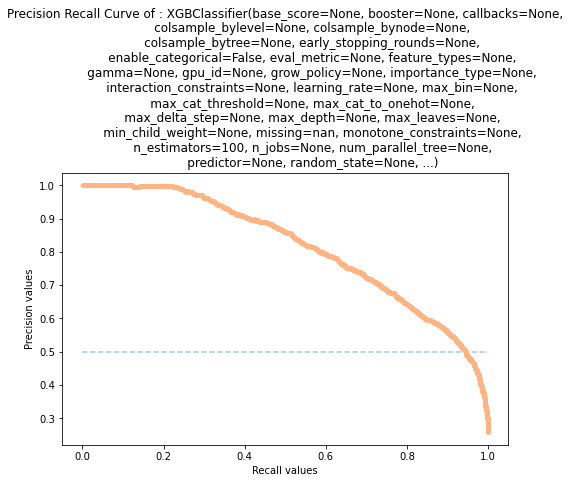

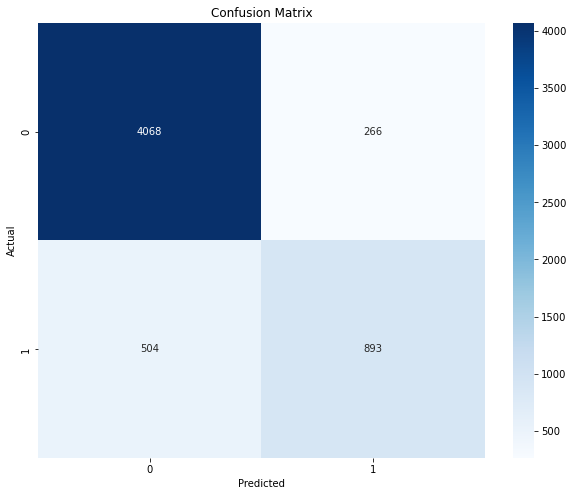

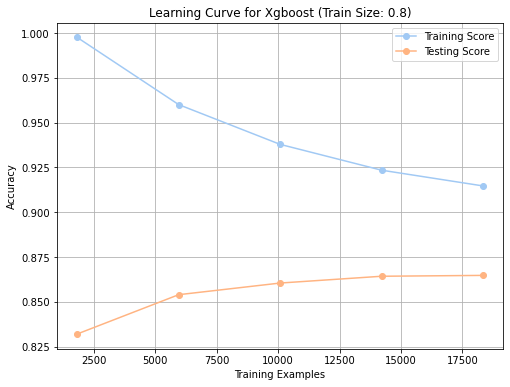

Cross-Validation Scores for Xgboost: [0.86302565 0.86459606 0.86494504 0.87242583 0.87050611]
Mean CV Score for Xgboost: 0.8670997358903219




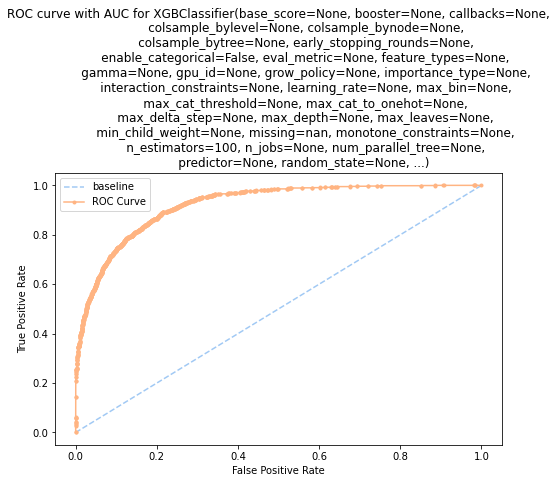

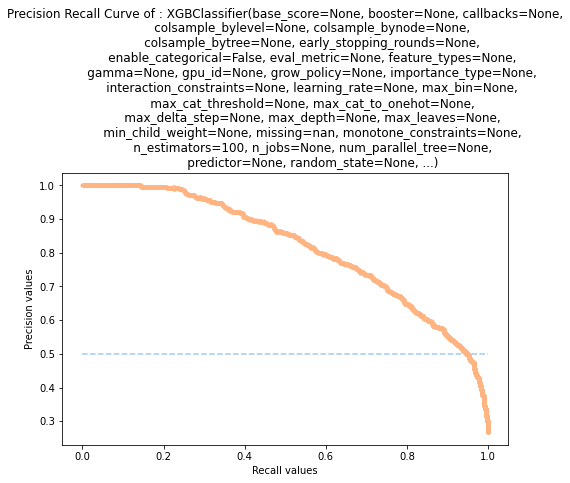

In [40]:
X = df.drop(columns =['Income','Race','Native_country'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a list of models to evaluate
models = [
    ('DecisionTree', DecisionTreeClassifier(criterion='entropy')),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=3)),
    ('LogisticRegression',LogisticRegression()), #Logistic Regression
    ('Xgboost',XGBClassifier())
]


model_score = []
acc_list = []
auc_roc=[] 
b_auc=[]
auc_pc=[]
ap=[]
f1=[]

for model_name, model in models:
    print(f"Model: {model_name}")
    train_sizes = [0.7, 0.8]
    
    for train_size in train_sizes: 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        
        model.fit(X_train,y_train)
    
    
        y_pred = model.predict(X_test)
       
        print("\n\n\nMODEL NAME : ",model,"\n\n\n\n")
    
        print((classification_report(y_test, y_pred)),"\n\n\n")
    
        confusion = confusion_matrix(y_test, y_pred)
        print('\n\nConfusion Matrix:')
        print(confusion)
        
        
    
        model_score.append(model.score(X_train,y_train))
        acc_list.append(accuracy_score(y_test,y_pred))
        
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate mean training and testing scores across folds
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
    
    # Check for overfitting or underfitting
        if abs(train_scores_mean[-1] - test_scores_mean[-1]) < 0.05:
            status = "Good Fit"
        elif train_scores_mean[-1] > test_scores_mean[-1]:
            status = "Overfitting"
        else:
            status = "Underfitting"
    
    # Print the results
        print(f"Train Size: {train_size}, Train Score: {train_scores_mean[-1]:.2f}, Test Score: {test_scores_mean[-1]:.2f}, Status: {status}")
        
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        
    # Plot learning curves
        plt.figure(figsize=(8, 6))
        plt.title(f'Learning Curve for {model_name} (Train Size: {train_size})')
        plt.xlabel('Training Examples')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Score')
        plt.legend(loc='best')
        plt.show()

## Plot ROC AUC Curve    
        baseline_probs = [0 for _ in range(len(y_test))] # generate a baseline prediction (majority class)
        probs = model.predict_proba(X_test) # predict probabilities
        probs = probs[:, 1] # keep probabilities for the positive outcome only
        auc_roc.append(roc_auc_score(y_test, probs)) # calculate scores
        b_auc.append(roc_auc_score(y_test,baseline_probs))
        fpr, tpr, thresholds = roc_curve(y_test, probs) # calculate roc curve
        bl_fpr, bl_tpr, thresholds = roc_curve(y_test, baseline_probs)    
        fig = plt.figure(figsize=(8,5)) # plot the roc curve for the model
        plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
        plt.plot(fpr, tpr, marker='.',label='ROC Curve')
        plt.title("ROC curve with AUC for {} ".format(model)) # plot title
        plt.xlabel("False Positive Rate") # axis labels
        plt.ylabel("True Positive Rate")
        plt.legend()
        
        
        # predict probabilities
        probs = model.predict_proba(X_test)
        probs = probs[:,1] # keep probabilities for the positive outcome only    
        prediction = model.predict(X_test) # predict class values
        precision, recall,thresholds = precision_recall_curve(y_test, probs)
        auc_pc.append(metrics.auc(recall, precision))
        f1.append(f1_score(y_test, prediction))
        ap.append(average_precision_score(y_test, probs))    
        fig = plt.figure(figsize=(8,5)) # plot the precision-recall curves
        plt.ylabel("Precision values")
        plt.xlabel("Recall values")  
        plt.title("Precision Recall Curve of : %s"%model)
        plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
        plt.plot(recall, precision, marker='.',label="PR curve")

        
        
    
    # Perform cross-validation to get a more robust evaluation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        print(f"Cross-Validation Scores for {model_name}:", cv_scores)
        print(f"Mean CV Score for {model_name}:", np.mean(cv_scores))
        print("\n")    

In [41]:
model_list=['Decision Tree Classifier(0.7)','Decision Tree Classifier(0.8)','Random Forest Classifier(0.7)','Random Forest Classifier(0.8)','KNN Classifier(0.7)','KNN Classifier(0.8)',
           'Logistic Regression(0.7)','Logistic Regression(0.8)','XGBoost Classifier(0.7)','Xgboost Classifier(0.8)']

result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

,Model,Model_score,Accuracy,roc_auc_score,f1-score,precision-recall AUC,average precision score
0,Decision Tree Classifier(0.7),1.000000,0.817241,0.751075,0.621355,0.666616,0.476594
1,Decision Tree Classifier(0.8),0.999956,0.815739,0.752293,0.624467,0.669772,0.480535
2,Random Forest Classifier(0.7),1.000000,0.857143,0.905244,0.674616,0.782075,0.779143
3,Random Forest Classifier(0.8),0.999913,0.851509,0.905026,0.665356,0.783714,0.780838
4,KNN Classifier(0.7),0.897941,0.819335,0.822145,0.613778,0.665321,0.572192
5,KNN Classifier(0.8),0.897827,0.813296,0.815972,0.607771,0.663667,0.570279
6,Logistic Regression(0.7),0.803709,0.798744,0.816317,0.424484,0.620869,0.620975
7,Logistic Regression(0.8),0.803638,0.798116,0.821211,0.426944,0.627920,0.628079
8,XGBoost Classifier(0.7),0.913048,0.866799,0.922087,0.695236,0.814300,0.814344
9,Xgboost Classifier(0.8),0.911744,0.865643,0.921366,0.698748,0.815843,0.815908


## Conclusion : 
# The best Model we got is : XGBoostClassifier with The Mean CV score 0.87 for test size 0.7 or 0.8 Giving Good Fit Model
    

In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Prepare your features (X) and target (y) from the encoded dataset
X = df.drop(columns =['Income','Race','Native_country'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create an XGBoost classifier with the best parameters
best_xgb_classifier = xgb.XGBClassifier(**best_params)

# Train the best classifier
best_xgb_classifier.fit(X_train, y_train)

# Make predictions with the best classifier
y_pred = best_xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best XGBoost Classifier Accuracy:", accuracy)
print("Best Hyperparameters:", best_params)


Best XGBoost Classifier Accuracy: 0.8708776827778747
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
